# **E-Commerce Customer Churn Analysis and Prediction**
**Capstone Project Module 3 - Machine Learning**

**Ahmad Husaini JCDS 0406 009**

A. Business Problem Understanding

B. Data Understanding

C. Data Analysis

D. Data Preprocessing and Feature Engineering

E. Benchmark Model

F. Hyperparameter Tuning

G. Model Evaluation

H. Explainable Model

I. Conclusion and Recommendation

---
## **A. Business Problem Understanding**


### A.1 Background

Sebuah perusahaan E-Commerce melakukan analisa terhadap perkembangan bisnis mereka dan menemukan bahwa salah satu tantangan yang dihadapi adalah pelanggan yang melakukan Churn (berhenti melakukan transaksi).

Apa itu customer churn?
Customer churn adalah metrik bisnis yang mengukur jumlah pelanggan yang telah berhenti menggunakan produk atau layanan Anda. Ketika perusahaan mampu mengurangi atau mencegah customer churn , mereka dapat meningkatkan customer lifetime value (CLV). CLV adalah jumlah total uang yang dapat Anda harapkan dari rata-rata pelanggan untuk dibelanjakan dengan bisnis Anda selama masa hidup mereka.

Jauh lebih murah bagi perusahaan untuk mempertahankan basis pelanggan mereka saat ini daripada menghabiskan sumber daya untuk mendapatkan pelanggan baru. Oleh karena itu, mengeksplorasi strategi untuk mengurangi dan mencegah customer churn  dapat menjadi cara yang bagus untuk meningkatkan profitabilitas perusahaan.

Sebagai konteks, ada dua cara agar perusahaan dapat mempertahankan profitabilitas perusahaan. Pertama yaitu mempertahankan customer lama agar menetap sebagai customer. Cara kedua yaitu mencari customer baru. Berdasarkan statistik dari berbagai industri bisnis, hasil riset menemukan bahwa customer acquisition memiliki biaya 4-5x lipat lebih dari customer retention

Untuk memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba hitung dampak biaya berdasarkan asumsi berikut :
- Customer Lifetime Period untuk pelanggan yang churn sekitar 17.7 bulan
- Customer Acquisition Cost (CAC) = 315 USD per customer ([sumber](https://www.revechat.com/blog/customer-acquisition-cost/)) / 17.7 bulan = 17.79 USD per bulan per customer
- Customer Retention Cost (CRC)= 1/5 ([sumber](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/)) * CAC = 1/5 * 17.79 USD = 3.56 USD per bulan per customer
- Average Customer MonthlyCharge = 64.88 USD per bulan per customer

Berdasarkan asumsi di atas maka kita dapat coba kuantifikasi konsekuensinya sebagai berikut :
- tidak efektifnya pemberian insentif retensi --> maka kita menyia-nyiakan biaya CRC sebesar 3.56 USD per bulan per pelanggan
- kehilangan pelanggan --> maka kita kehilangan pendapatan dan juga perlu mengeluarkan kembali biaya CAC sehingga secara total kita kehilangan 17.79 USD + 64.88 USD = 82.67 USD per bulan per pelanggan

Dengan demikian, bagi perusahaan E-Commerce untuk mendapatkan customer baru mengahbiskan biaya yang lebih banyak dibandingkan dengan mempertahankan customer lama untuk tidak churn sehingga kita harus lebih fokus ke customer retention. Sehingga, perusahaan harus memikirkan cara untuk memprediksi customer yang berpotensi untuk churn dan memberikan treatment yang diperlukan agar customer menetap di platform E-Commerce perusahaan.

### A.2 Problem Statement

Tingginya persentase customer churn menjadi salah satu indikator tingkat kegagalan suatu perusahaan E-Commerce, maka perlu dilakukan upaya-upaya untuk mengurangi persentase customer churn tersebut. Perusahaan umumnya lebih memilih untuk mempertahankan pelanggan, karena dibutuhkan biaya yang lebih sedikit untuk mempertahankan pelanggan (customer retention cost) daripada menambah pelanggan yang baru (customer acquisition cost). Berdasarkan informasi dari [internet](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/), memperoleh pelanggan baru dapat menghabiskan biaya lima kali lebih banyak daripada mempertahankan pelanggan yang sudah ada.

Perusahaan E-Commerce dapat memberikan insentif retensi seperti memberikan Cashback (hadiah uang tunai), Discount (potongan harga), gratis ongkos kirim, memberikan paket layanan yang menarik, memberikan prioritas pelayanan dan lain-lain dalam upaya untuk mempertahankan pelanggan. Namun, kebijakan pemberian insentif retensi belum sepenuhnya dilakukan secara efektif. Karena jika insentif retensi tersebut diberikan secara merata kepada seluruh pelanggan, maka pengeluaran biaya tersebut menjadi tidak efektif dan mengurangi potensi keuntungan apabila pelanggan tersebut memang loyal dan tidak ingin berhenti berlangganan.


### A.3 Goals

Berdasarkan masalah yang dihadapi di atas, perusahaan harus bisa **memprediksi customer mana saja yang berpotensi untuk churn, lalu memberikan treatment yang tepat untuk customer tersebut agar tidak churn**. Sehingga perusahaan bisa **mempertahankan keuntungan** yang telah didapatkan, **meminimalisir retention cost yang diperlukan** untuk customer yang mau melakukan churn serta, perusahaan ingin mengetahui faktor-faktor apa saja yang cenderung mempengaruhi pelanggan bertahan,

### A.4 Analytic Approach

Kita akan menganalisis data untuk menemukan pola yang membedakan customer yang akan churn atau yang tidak churn. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi customer akan churn atau tidak.


### A.5 Metric Evaluation

|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TP | FP |
| **P-Act**      | FN | TP |

Target:
- 0: customer tidak churn
- 1: customer churn

Confusion Metrix Term:
- TP: customernya aktualnya churn dan diprediksi churn
- TN: customernya aktualnya tidak churn dan diprediksi tidak churn
- FN: customernya aktualnya churn dan diprediksi tidak churn
- FP: customernya aktualnya tidak churn dan diprediksi churn

Cost FN (False Negative):
- Kekurangan
    - Kehilangan customer (alias churn)
    - Adanya cost customer acquistion untuk menggantikan customer yang telah churn   

Cost FP (False Positive):
- Kelebihan
    - Akibat dari salah treatment terhadap customer yang sebenarnya tidak churn tapi diprediksi churn, maka reputasi E-Commerce semakin baik (customer yang tidak churn akan mengira bahwa plaform E-Commerce murah hati untuk memberikan promo secara cuma-cuma)
    <br><br>
- Kekurangan
    - Salah target treatment untuk customer yang tidak churn (tapi diprediksi churn)
    - Sia-sianya biaya customer retention, waktu dan sumber daya

Dengan demikian, maka perusahaan berusaha untuk membuat model yang dapat mengurangi cost customer retention dari perusahaan tersebut tetapi tanpa harus ada customer yang churn dari website E-Commerce perusahaan. Oleh karena itu, kita memutuskan untuk menitikberatkan ke False Negative, tetapi juga tidak lupa dengan False Positive, dengan lebih menitikberatkan pada recall. Maka dari itu focus metric yang akan digunakan adalah **F2-Score**



---
## **B. Data Understanding and Cleaning**


### B.1 Library and Data

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
!pip install category_encoders
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

# Imbalance Dataset
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN,SMOTETomek

# Shap
!pip install shap
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

  # Saving Model
import pickle

### B.2 Dataset

Dataset yang digunakan adalah dataset dari perusahaan E-Commerce yang bertujuan untuk mengidentifikasi pelanggan yang berpotensi beralih (churn). Dengan begitu, perusahaan E-Commerce dapat mendekati pelanggan yang berpotensi beralih (churn) dan menawarkan promo-promo yang tepat kepada pelanggan.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AhmadH_CapstoneProject3/data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### B.3 Data Information and Attribution

In [4]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB



| Attribute | Description |
| --- | --- |
| Tenure | Masa pelanggan mulai berlangganan pada layanan |
| WarehouseToHome | Jarak antara gudang dan rumah pengguna |
| NumberOfDeviceRegistered | Jumlah perangkat yang diregistrasikan terhadap satu pengguna/akun |
| PreferedOrderCat | Kategori yang sering dipesan dalam satu bulan terakhir |
| SatisfactionScore | Nilai kepuasan pelanggan terhadap pelayanan |
| MaritalStatus | Status pernikahan pelanggan |
| NumberOfAddress | Jumlah alamat yang terdaftar dalam satu pengguna |
| Complaint | Keluhan yang diajukan dalam satu bulan terakhir |
| DaySinceLastOrder | Hari terakhir pemesanan yang dilakukan oleh pelanggan |
| CashbackAmount | Rata-rata cashback dalam satu bulan terakhir |
| Churn | Identifikasi pengguna churn atau tidak. 1 untuk churn, 0 untuk tidak churn |

In [5]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (3941, 11)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
Tenure,Tenure,float64,194,4.922608,0,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
WarehouseToHome,WarehouseToHome,float64,169,4.288252,0,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
NumberOfDeviceRegistered,NumberOfDeviceRegistered,int64,0,0.000000,0,6,"[4, 3, 6, 2, 5, 1]"
PreferedOrderCat,PreferedOrderCat,object,0,0.000000,0,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
SatisfactionScore,SatisfactionScore,int64,0,0.000000,0,5,"[3, 1, 4, 2, 5]"
MaritalStatus,MaritalStatus,object,0,0.000000,0,3,"[Single, Married, Divorced]"
NumberOfAddress,NumberOfAddress,int64,0,0.000000,0,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11]"
Complain,Complain,int64,0,0.000000,0,2,"[0, 1]"
DaySinceLastOrder,DaySinceLastOrder,float64,213,5.404720,0,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
CashbackAmount,CashbackAmount,float64,0,0.000000,0,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas dapat diketahui beberapa hal:  
* Terdapat 3941 baris dan 11 kolom pada dataset
* Data numerik dengan variabel quantitave antara lain Tenure, Warehouse to Home, Number of Device, Number of Address, Day Since Last Order, dan Cashback Amount. Data numerik yang menunjukkan yes or no atau bersifat qualitative adalah complain, dan churn. Data numerik yang menunjukkan qualitative dengan scale ordinal adalah satisfaction score. Data kategorik ada dua antara lain Prefered Order Cat dan Marital Status.
* Dari info dataset terlihat ada beberapa missing value, yang akan ditindak-lanjuti di data cleaning


In [6]:
# Mengetahui Summary Deskriptif
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


### Data Duplikat dan Typo
Pertama kita ingin mengetahui data unik masing-masing fitur, dan mengetahui apabila ada duplikat atau typo pada dataset.

In [7]:
# Data unik masing-masing fitur
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas dapat dilihat bahwa tidak ada typo. Selain itu, dari fitur kategori yang disukai terdapat 2 kategori yang sama yaitu 'Mobile' dan 'Mobile Phone', sehingga semua baris dengan kategori 'Mobile' pada kolom tersebut akan diganti menjadi 'Mobile Phone'.

In [8]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [9]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Setelah kategori disesuaikan, akan dilihat apabila terdapat data duplikat. Karena tidak adanya informasi Customer ID sehingga langkah yang dilakukan adalah melihat setiap baris yang memiliki data yang sama.

In [10]:
# Melihat Jumlah Data Duplikat
Duplikat = df.duplicated().sum()
PersentaseDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Terdapat 672 data duplikat dari 3941 baris dengan persentase 17,05%. Karena pada dataset **tidak adanya Customer ID** data dianggap benar-benar duplikat. Langkah yang dilakukan untuk menangani data duplikat adalah menghapus baris duplikat. Data duplikat harus dihapus karena dapat mempengaruhi performa model machine learning yang dibuat [(Reference)](https://deepchecks.com/what-is-data-cleaning/), hasil evaluasi data test bisa menjadi bias karena adanya information leakage dari data yang ditraining.

In [11]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


### Missing Value
Setelah membersihkan data duplikat, kita akan melihat apabila ada missing value pada dataset.

In [12]:
# Melihat Missing Value masing-masing kolom
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [13]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df.isnull().sum().sum()}
Jumlah baris dengan missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')


Jumlah missing value: 475
Jumlah baris dengan missing value: 475
Persentase Baris dengan missing value: 14.53%


Karena jumlah missing value cukup besar yaitu 14,53%, baris yang berisi missing value tidak akan didrop karena dapat mengurangi jumlah data dan informasi yang diketahui. Semua missing value diatas merupakan data numerik dalam tipe float dengan jenis kontinu. Missing value akan dianalisa lebih lanjut dengan menggunakan package missingno, dengan mengetahui tipe data yang hilang dapat mempermudah pemilihan metode *handling missing value*. Sumber: ([Identifying missingness with missingno.](https://digitaltesseract.com/data-imputation-techniques-an-introduction/))

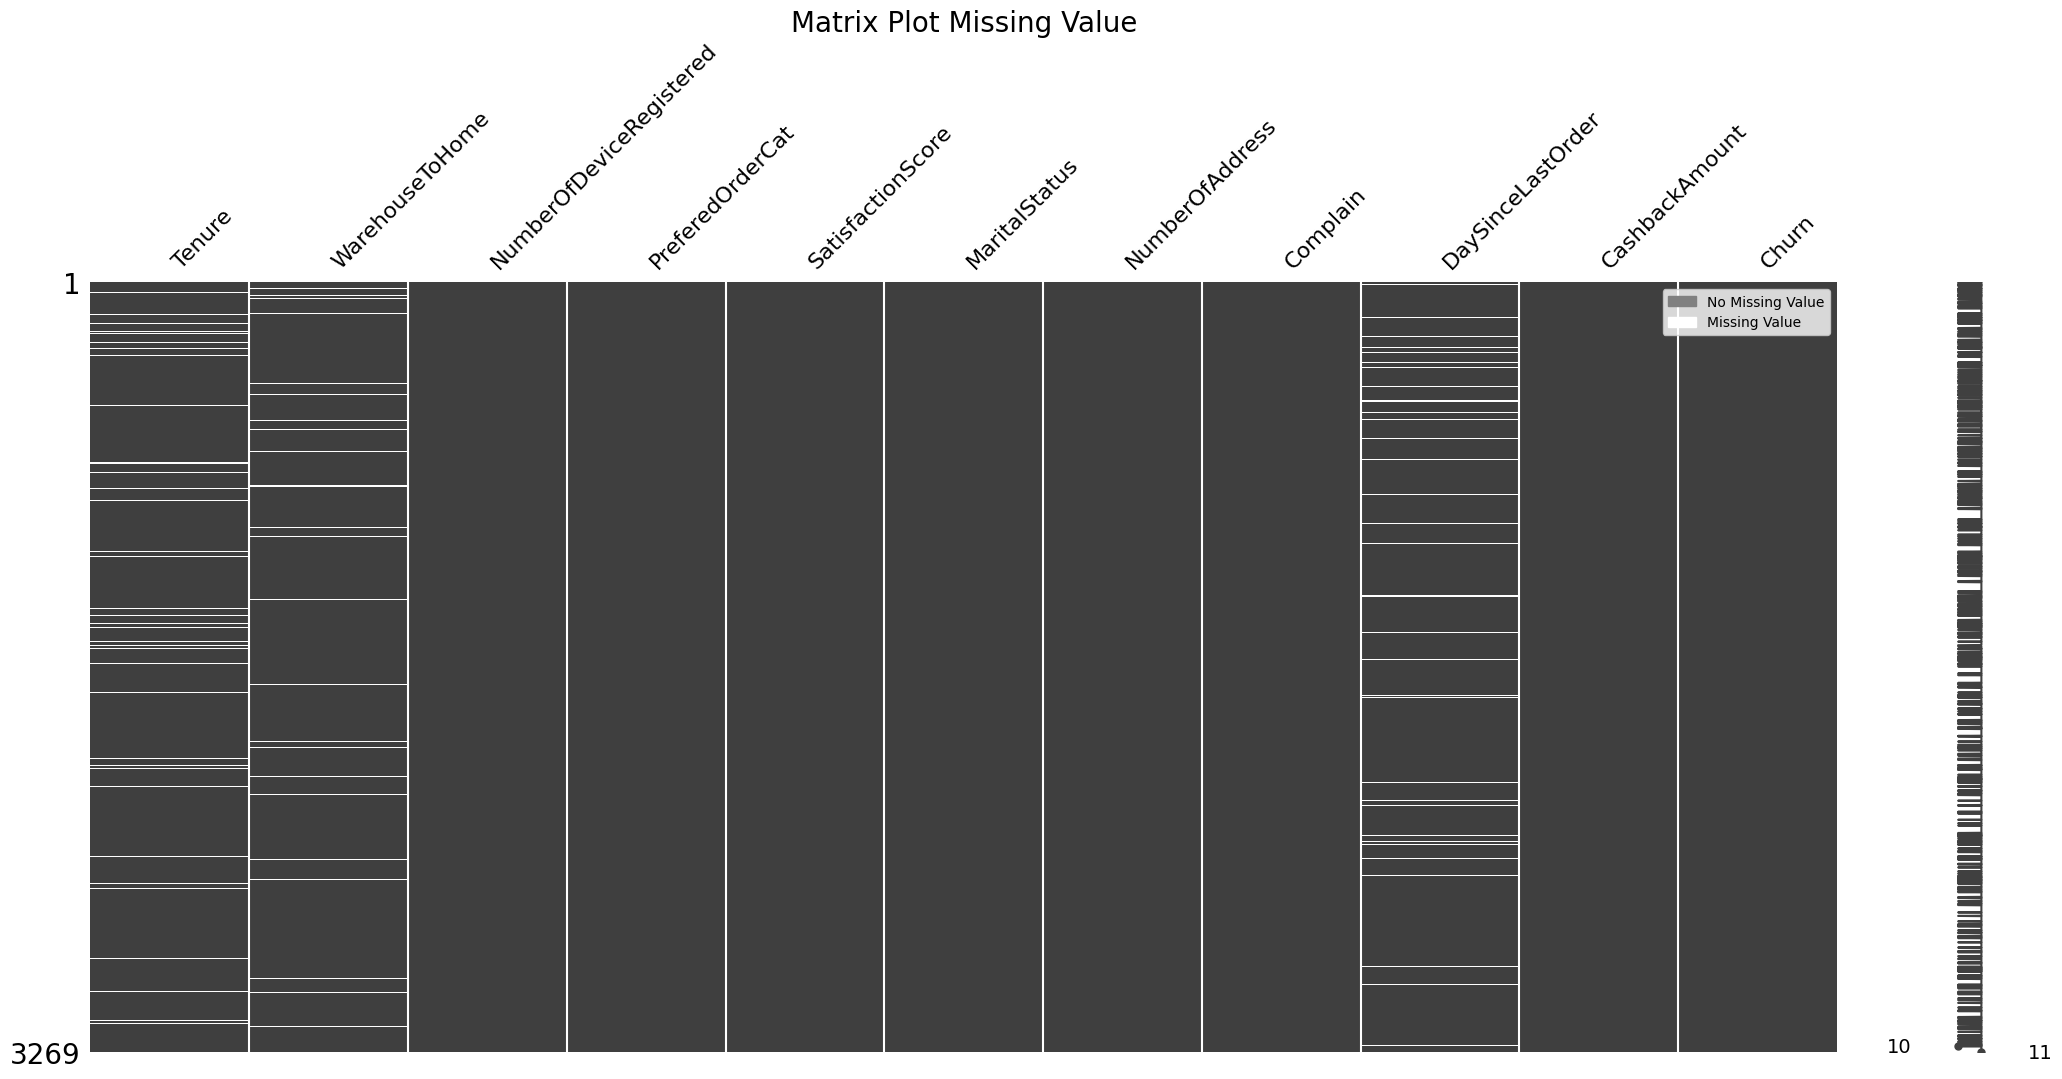

In [14]:
# Melihat missing value dengan matrix plot
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='No Missing Value')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()


Terlihat bahwa missing value tidak menunjukkan pola tertentu dan cukup acak. Dari fitur diatas, variabel yang dapat berpengaruh antara lain SatisfactionScore dan CashbackAmount yang berdampak langsung pada transaksi. Sehingga akan dilakukan sort berdasarkan dua variabel tersebut.

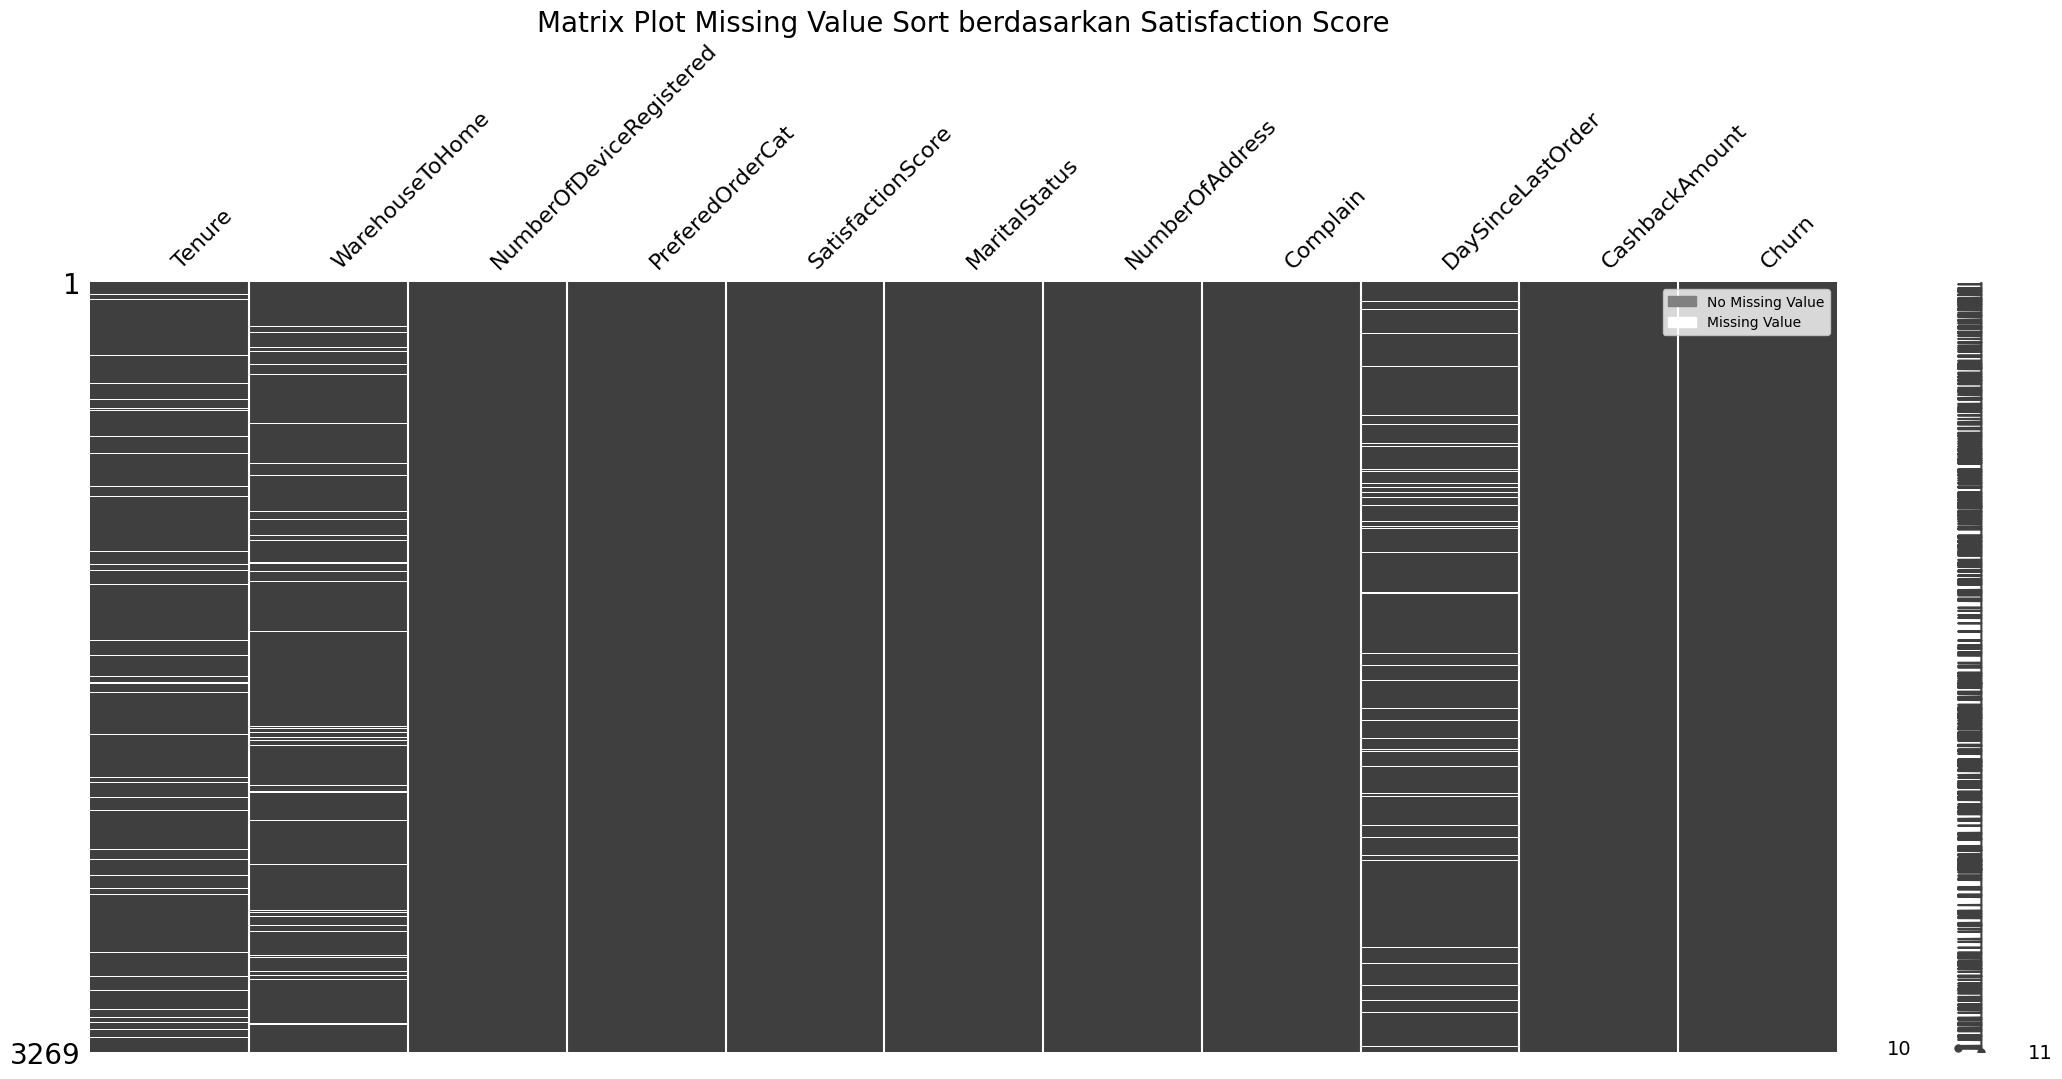

In [15]:
# Matrix missing value berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='No Missing Value')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Satisfaction Score', fontsize=20)
plt.show()

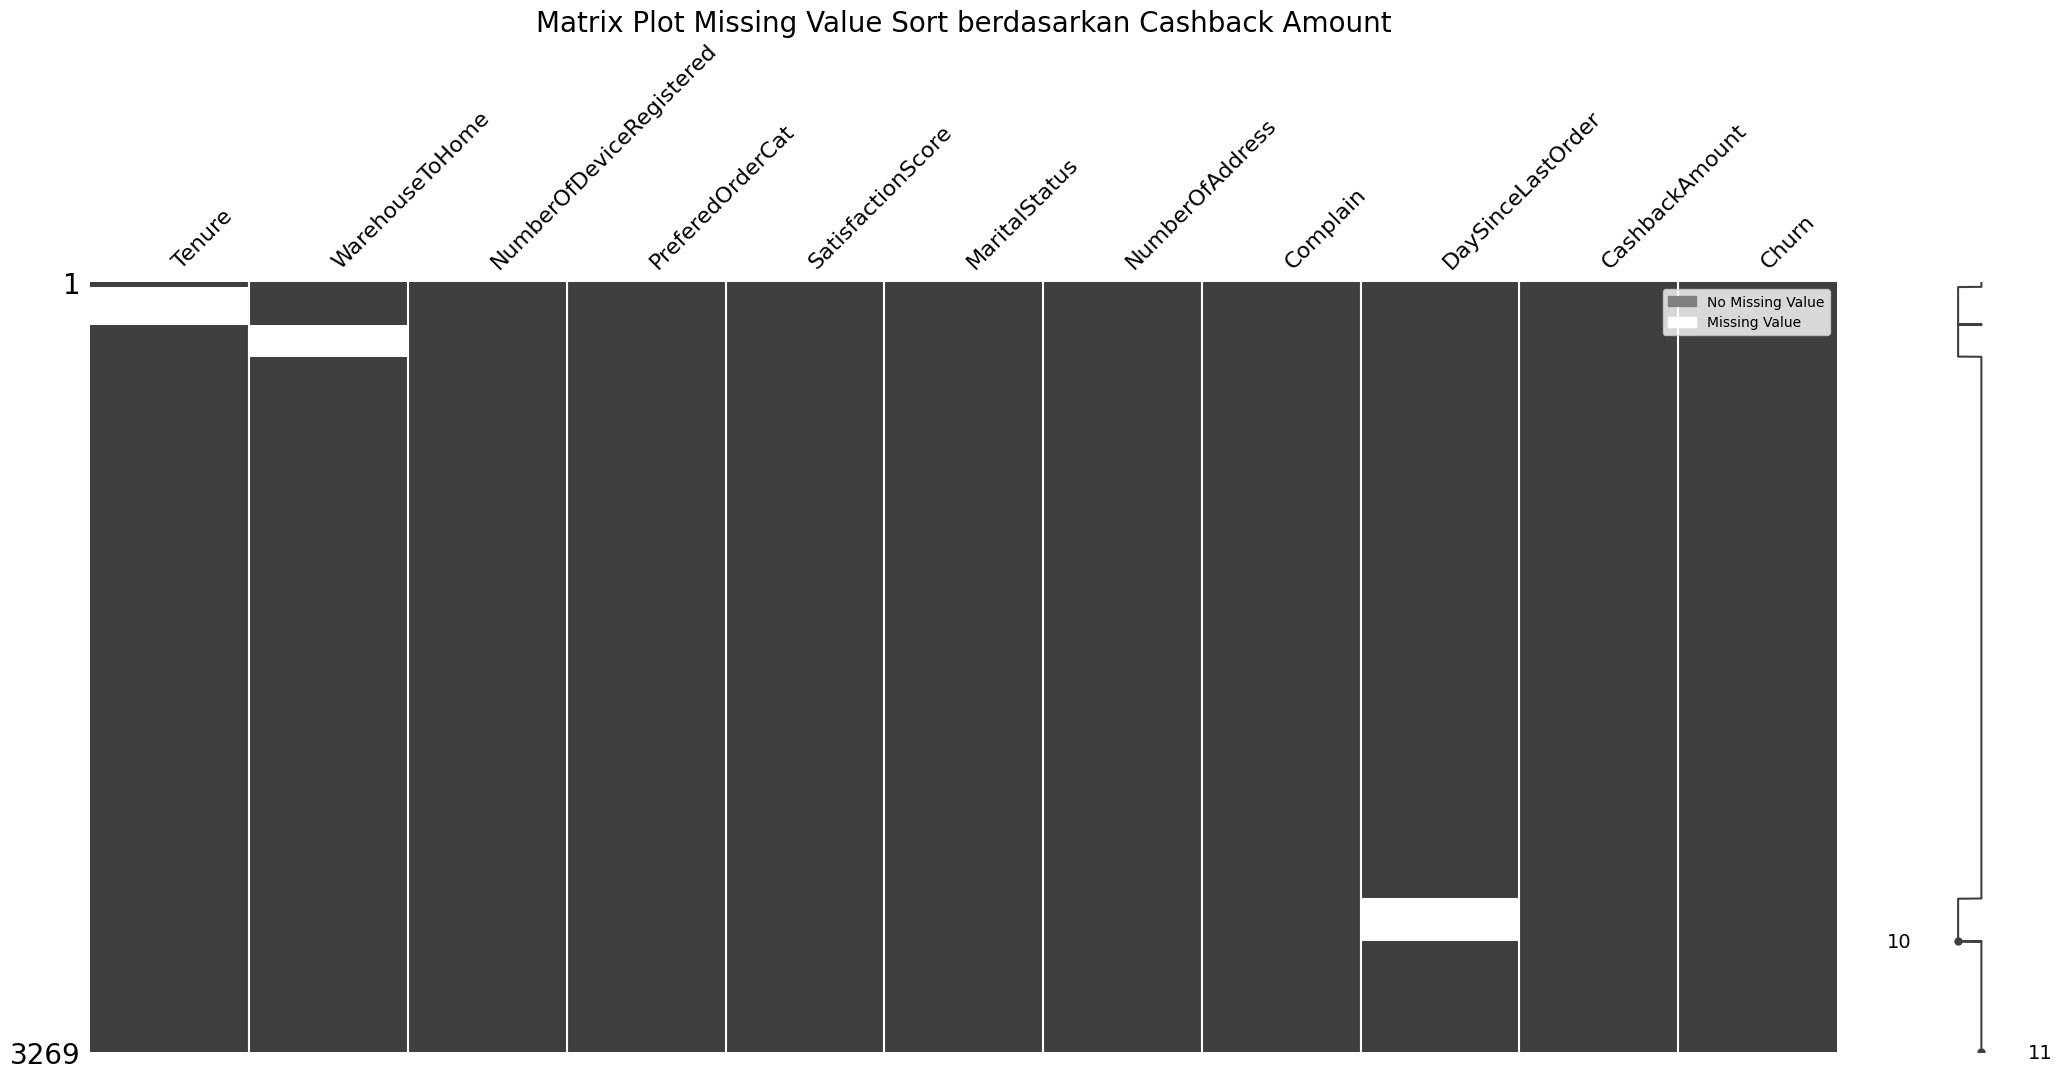

In [16]:
# Matrix missing value berdasarkan Cashback Amount
msno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='No Missing Value')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

In [17]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,159.000000,159.000000,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,152,NaN,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.408805,3.238994,NaN,3.100629,NaN,3.201258,0.264151,2.150943,120.415535,0.295597
std,NaN,7.680498,0.822616,NaN,1.303331,NaN,2.425549,0.442273,2.413540,2.744332,0.457753
min,NaN,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,120.280000,0.000000
50%,NaN,13.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.090000,0.000000
75%,NaN,19.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.180000,1.000000


In [18]:
# Describe kolom missing value berdasarkan WarehouseToHome
df[df['WarehouseToHome'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,135.000000,0.0,135.000000,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,130,NaN,57,NaN,NaN,NaN,NaN,NaN
mean,6.059259,NaN,3.192593,NaN,3.014815,NaN,3.355556,0.303704,2.444444,124.609778,0.333333
std,7.308514,NaN,0.868145,NaN,1.450606,NaN,2.414096,0.461569,2.610732,1.008970,0.473160
min,0.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,123.720000,0.000000
50%,3.000000,NaN,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,124.500000,0.000000
75%,10.000000,NaN,4.000000,NaN,4.000000,NaN,5.000000,1.000000,3.000000,125.590000,1.000000


In [19]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,181.000000,181.000000,181.000000,181,181.000000,181,181.000000,181.000000,0.0,181.000000,181.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,138,NaN,102,NaN,NaN,NaN,NaN,NaN
mean,11.812155,15.718232,4.077348,NaN,2.883978,NaN,4.850829,0.259669,NaN,220.978232,0.165746
std,8.492354,8.251138,0.933682,NaN,1.434812,NaN,2.585185,0.439669,NaN,6.544886,0.372884
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,1.000000,NaN,3.000000,0.000000,NaN,215.100000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.370000,0.000000
75%,19.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.210000,0.000000


Dari matrix plot diatas, dapat dilihat bahwa data hilang secara acak (General pattern) tetapi memiliki hubungan dengan variabel CashbackAmount. Hal ini menunjukkan data Missing at Random(MAR) atau terdapat hubungan sistematis antara variabel yang hilang dan variabel lain, tetapi tidak pada variabel yang memiliki missing value itu sendiri. Jika hilangnya tampak acak tetapi ketika Anda menggali lebih dalam dan Anda menemukan hubungan antara fitur yang ada (ini adalah kuncinya), Missing Value adalah MAR [(Sumber)](https://towardsdev.com/how-to-identify-missingness-types-with-missingno-61cfe0449ad9).
Dari data diketahui beberapa hal:
* Data Tenure yang kosong memiliki range rata-rata cashback dari  112,00 sampai 123,13
* Data WarehouseToHome yang kosong memiliki range rata-rata cashback dari 123,18 sampai 126,57
* Data DaySinceLastOrder yang kosong memiliki range rata-rata cashback dari 209,34 sampai 231,42
* Setiap Missing value dari masing-masing feature memiliki kesamaan yaitu nilai kategori marital status terbanyak adalah Married

Sehingga akan dianalisa lebih lanjut apabila ada hubungan antara kolom MaritalStatus dengan kolom kosong

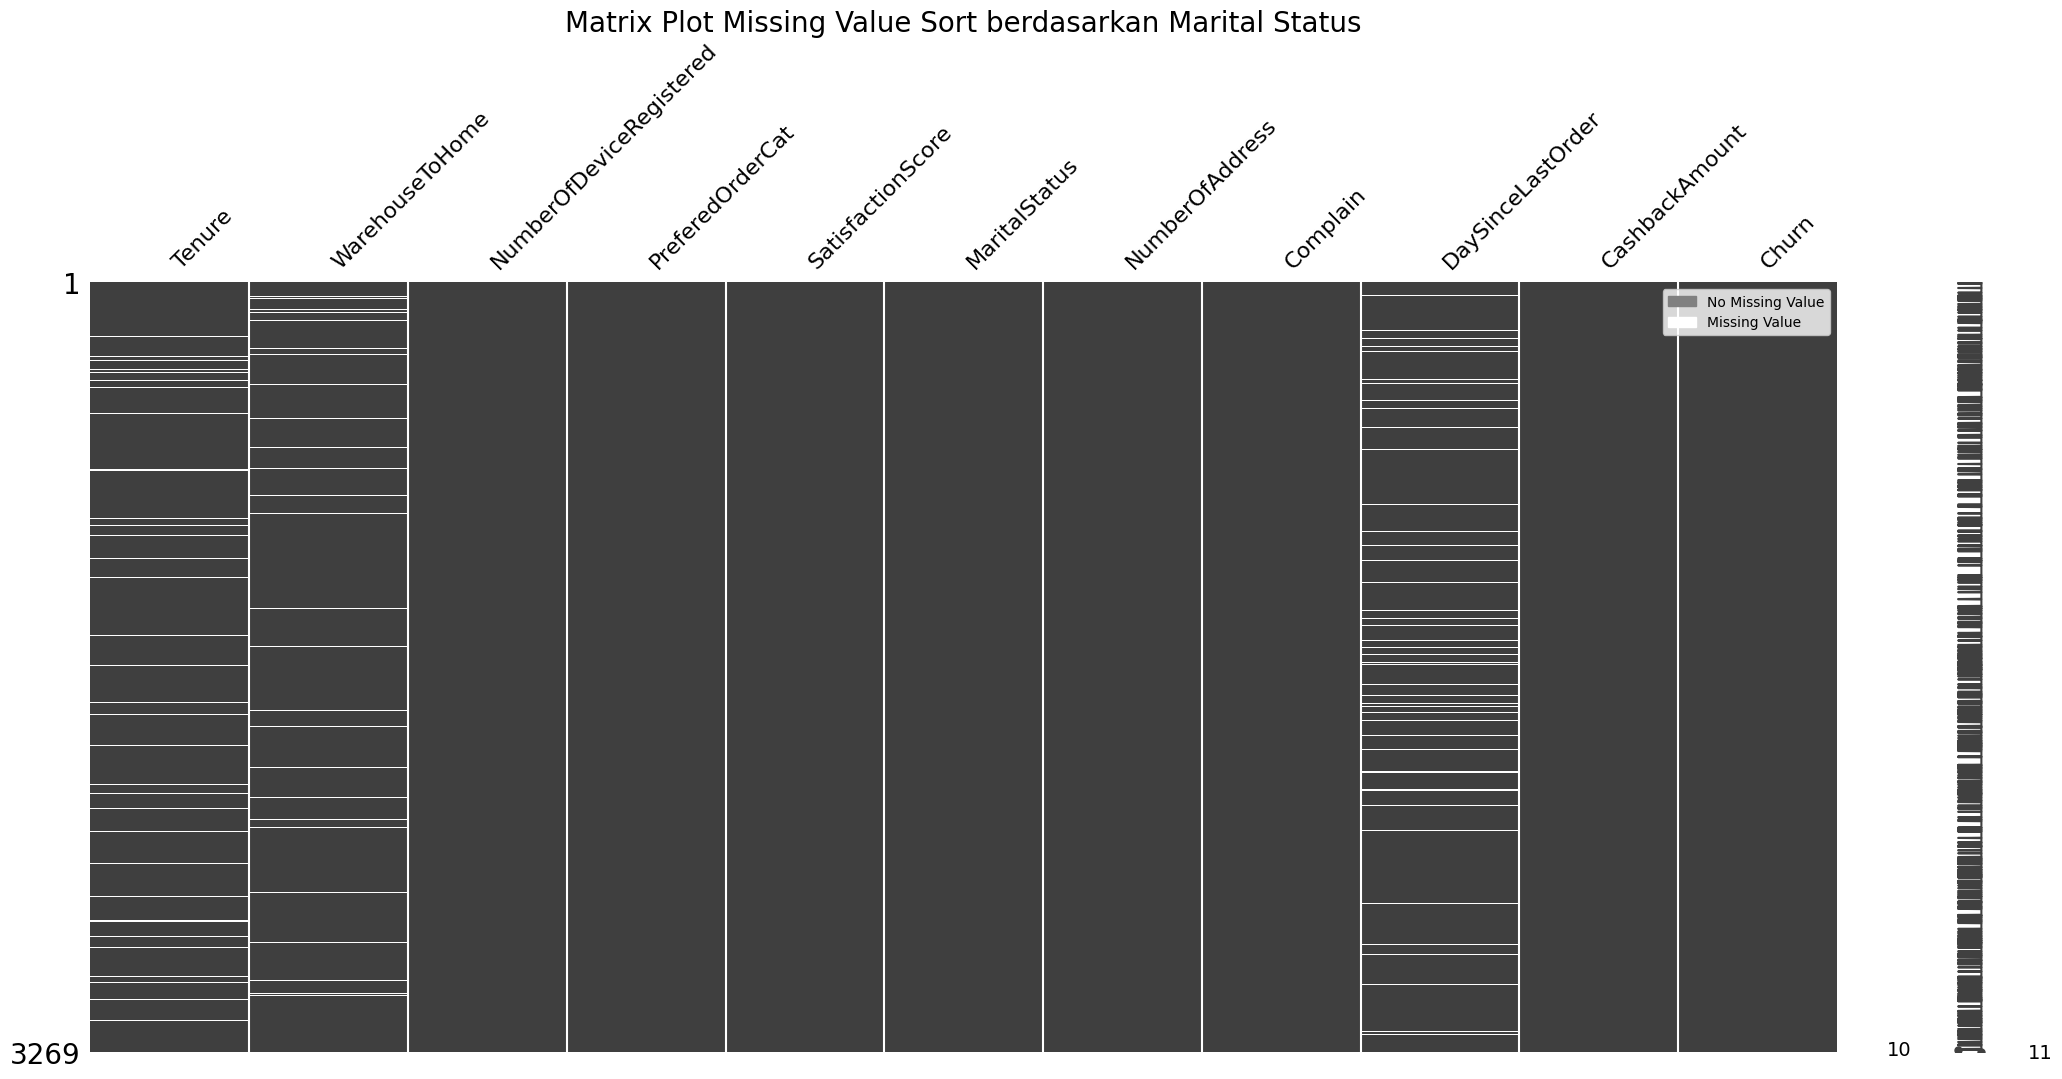

In [20]:
# Matrix missing value berdasarkan Marital Status
msno.matrix(df.sort_values(by=['MaritalStatus'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='No Missing Value')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Marital Status', fontsize=20)
plt.show()

In [21]:
# Melihat total data hilang dengan kategori Married pada Marital Status
(df[df['MaritalStatus']=='Married'].isna().sum()/df.isna().sum())*100

Tenure                      47.169811
WarehouseToHome             42.222222
NumberOfDeviceRegistered          NaN
PreferedOrderCat                  NaN
SatisfactionScore                 NaN
MaritalStatus                     NaN
NumberOfAddress                   NaN
Complain                          NaN
DaySinceLastOrder           56.353591
CashbackAmount                    NaN
Churn                             NaN
dtype: float64

In [22]:
print(f'''Jumlah data :\n {df['MaritalStatus'].value_counts()}
Persentase data: \n {df['MaritalStatus'].value_counts('Married')*100}''')

Jumlah data :
 Married     1686
Single      1007
Divorced     576
Name: MaritalStatus, dtype: int64
Persentase data: 
 Married     51.575405
Single      30.804527
Divorced    17.620067
Name: MaritalStatus, dtype: float64


Setelah dianalisa lebih lanjut, pada matrix missing value berdasarkan Marital Status tidak menunjukkan pola tertentu, selain itu kolom Marital Status dengan kategori Married memang memiliki proporsi terbanyak pada dataset, sehingga diambil kesimpulan bahwa marital status married tidak memberikan pengaruh pada hilangnya data.

Kesimpulan yang bisa diambil dari hasil pengamatan tersebut adalah data missing value merupakan MAR dan memiliki hubungan dengan kolom CashbackAmount, metode yang bisa digunakan adalah menggunakan Iterative Imputation karena data berupa multivariate atau dipengaruhi oleh variabel lain. Selain itu handling missing value tidak menggunakan median karena banyaknya data missing yang diubah menjadi median akan menghasilkan total data yang bias dan bisa mempengaruhi model. ([Pemilihan Metode](https://digitaltesseract.com/data-imputation-techniques-an-introduction/)) Sebelum itu akan dilakukan percobaan untuk melihat perbedaan distribusi kolom sebelum dan sesudah dilakukan imputasi pada kolom Tenure, WarehouseToHome, dan DaySinceLastOrder. Hasil yang diharapkan adalah perbedaan distribusi kolom sebelum dan sesudah imputasi tidak terlalu berbeda.

### B.4 Exploratory Data Analysis

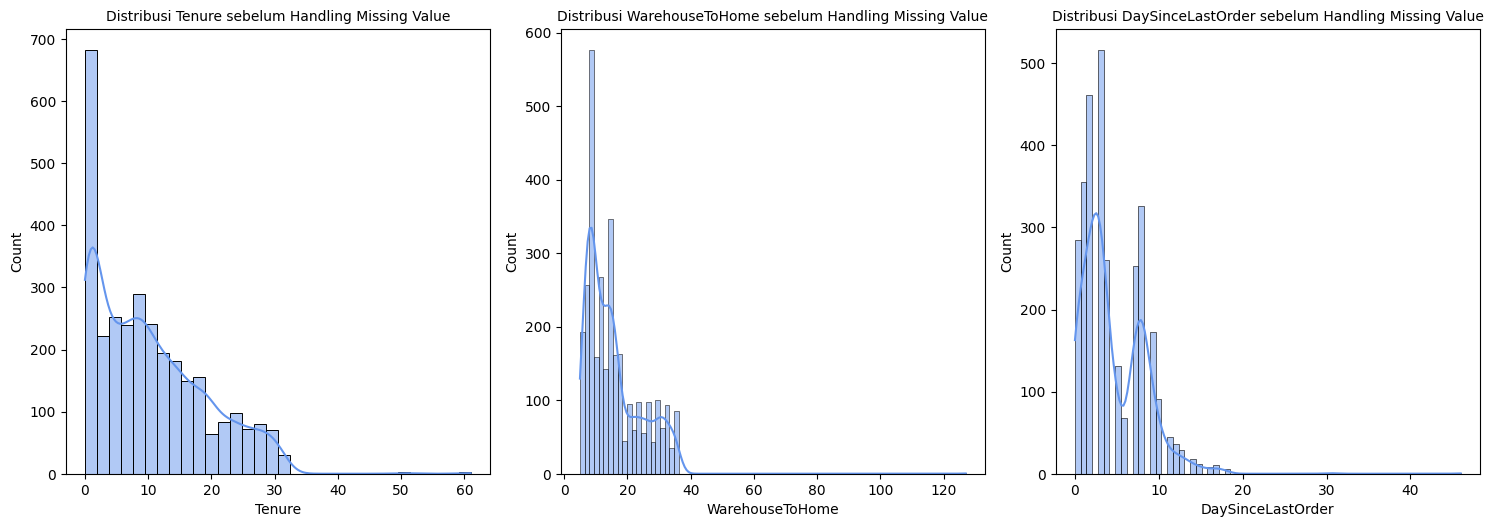

In [23]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.histplot(df[features[i]], color='cornflowerblue', kde=True)
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Handling missing value akan dilakukan pada saat data preprocessing.

### Outlier
Terdapat beberapa model yang sensitif terhadap outlier yang akan digunakan, seperti Logistic Regression, K-Nearest Neighbour, dsb. Sehingga akan dianalisa terkait outlier yang terdapat pada dataset.

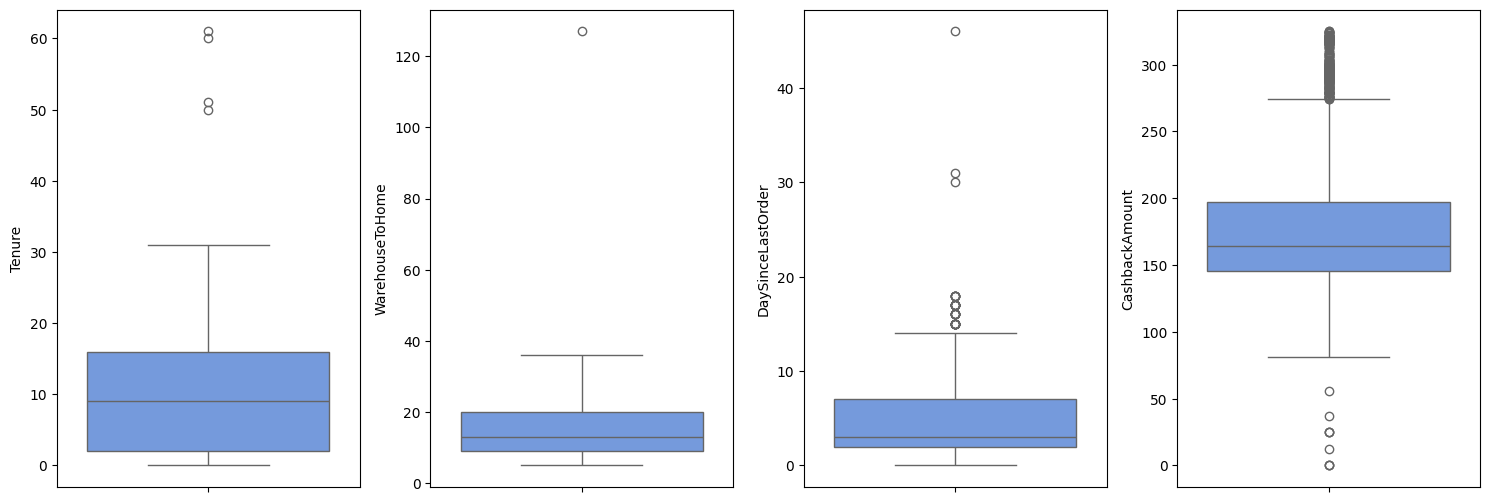

In [24]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()


In [25]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(features)):
    Q1 = df[features[i]].quantile(0.25)
    Q3 = df[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[features[i]]< lower_bound) | (df[features[i]]> upper_bound)
    outlier = df.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound Tenure adalah -19.0, dan Upper Bound Tenure adalah 37.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.13%
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.3%
Lower Bound CashbackAmount adalah 69.04, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%


Dari perhitungan diatas, data outlier pada kolom Tenure dan WarehouseToHome akan di drop karena memiliki persentase yang kecil. Sedangkan pada DaySinceLastOrder dan CashbackAmount diabaikan karena dianggap sebagai nilai yang wajar apabila memiliki nilai dengan variasi tinggi. Akan ditindak-lanjuti di bagian preprocessing dengan melakukan binning pada CashbackAmount.

## C. Data Analysis

Setelah dilakukan proses data cleaning, akan dilakukan analisa untuk memahami karakteristik pelanggan yang churn. Akan dilihat proporsi pelanggan yang tidak churn dan pelanggan yang churn.

#### C.1 Customer Churn

In [26]:
# Perbandingan pelanggan tidak churn dan churn
df['Churn'].value_counts()

0    2736
1     533
Name: Churn, dtype: int64

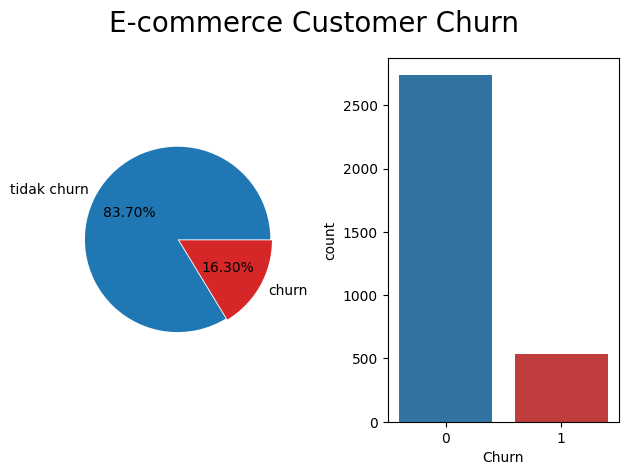

In [27]:
sns.set_palette('pastel')

plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)

plt.subplot(1, 2, 1)
plt.pie(df['Churn'].value_counts(), labels=['tidak churn', 'churn'], colors=['tab:blue', 'tab:red'], autopct='%.2f%%', explode=(0.01, 0.01))

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Churn', hue='Churn', palette=['tab:blue', 'tab:red'], legend=False)

plt.tight_layout()
plt.show()

Dari data diatas dapat dilihat bahwa dataset merupakan data moderate imbalance karena kelas timpang, dengan proporsi tidak churn 83,67% dan proporsi churn 16.33% ([sumber](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)). Data imbalance dapat memiliki dampak buruk pada model machine learning yang akan dibuat terutama pada saat memprediksi kelas dengan jumlah yang lebih sedikit atau kelas minoritas.

**Distribusi Data setiap Kolom Numerik**

Distribusi data setiap kolom perlu dilihat karena bisa menentukan metode apa yang akan digunakan selanjutnya.

In [28]:
from scipy.stats import normaltest

kolom=['Churn','Tenure','WarehouseToHome','DaySinceLastOrder','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','CashbackAmount']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')

pd.DataFrame({'distribusi':distribusi},index=kolom).T

,Churn,Tenure,WarehouseToHome,DaySinceLastOrder,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount
distribusi,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal


Semua kolom numerik tidak berdistribusi normal, artinya tidak ada perubahan dari yang sebelumnya.

**Customer Churn di setiap kolom**

Untuk memperkaya informasi, kita coba melihat distribusi data customer churn di setiap kolom.

In [29]:
pd.crosstab(df['WarehouseToHome'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).head(10).style.format('{:.2%}')

Churn,0,1
WarehouseToHome,,
9.000000,9.98%,9.43%
8.000000,8.73%,7.17%
7.000000,8.54%,6.15%
16.000000,5.06%,5.74%
10.000000,5.06%,5.12%
15.000000,5.40%,4.92%
6.000000,6.20%,4.71%
14.000000,6.05%,4.10%
11.000000,4.54%,3.89%


- Customer yang berlangganan E-Commerce ini memiliki jarak gudang dengan rumah cukup bervariasi antara 5 - 127 km.
- pada kolom `WarehouseToHome` kita melihat kecenderungan customer untuk churn tertinggi berada pada radius 7-9 km yang mana sebetulnya ini bukan jarak yang terlalu jauh.

In [30]:
pd.crosstab(df['Tenure'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).head(10).style.format('{:.2%}')

Churn,0,1
Tenure,,
1.000000,7.74%,40.53%
0.000000,4.92%,31.48%
3.000000,4.04%,2.47%
4.000000,4.50%,2.47%
5.000000,4.27%,2.26%
7.000000,4.31%,2.06%
8.000000,5.37%,2.06%
2.000000,3.58%,1.85%
13.000000,3.43%,1.65%


- Customer sudah berlangganan layanan ini yang terbaru 0 bulan dan yang terlama sudah 61 bulan.
- pada kolom `Tenure` kita melihat kecenderungan customer untuk churn tertinggi berada pada 0-1 bulan. Artinya cukup banyak customer yang baru berlangganan lalu memutuskan untuk berhenti berlangganan.

In [31]:
pd.crosstab(df['Complain'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).style.format('{:.2%}')

Churn,0,1
Complain,,
1,22.95%,54.97%
0,77.05%,45.03%


- Customer yang tidak complain cenderung untuk tidak churn ketimbang customer yang complain.
- Sebagian customer yang tidak puas terhadap layanan E-Commerce memutuskan untuk Churn.

In [32]:
pd.crosstab(df['NumberOfDeviceRegistered'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).style.format('{:.2%}')

Churn,0,1
NumberOfDeviceRegistered,,
4,42.76%,42.40%
3,31.07%,26.45%
5,14.00%,20.64%
6,2.16%,5.63%
1,4.50%,2.63%
2,5.52%,2.25%


- Customer Churn lebih banyak menggunakan device yang berbeda.

In [33]:
pd.crosstab(df['SatisfactionScore'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).style.format('{:.2%}')

Churn,0,1
SatisfactionScore,,
3,28.11%,30.39%
5,17.91%,27.20%
4,18.57%,18.01%
1,22.95%,14.82%
2,12.46%,9.57%


- Skor kepuasan pelanggan terhadap layanan ternyata tidak menjamin customer suka terhadap pelayanan E-Commerce, terbukti bahwa customer yang puas terhadap layanan ini cenderung Churn.

In [34]:
pd.crosstab(df['NumberOfAddress'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).head(10).style.format('{:.2%}')

Churn,0,1
NumberOfAddress,,
2,24.45%,26.08%
3,21.78%,23.83%
5,10.60%,7.32%
6,6.69%,7.13%
8,4.86%,6.75%
4,10.82%,6.57%
7,4.09%,6.19%
9,4.02%,5.07%
1,7.42%,4.13%


- beberapa customer mendaftarkan alamat pengiriman hingga 22 alamat.
- Customer yang Churn didominasi oleh customer mendaftarkan alamat lebih sedikit 2-3.

In [35]:
pd.crosstab(df['DaySinceLastOrder'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).head(10).style.format('{:.2%}')

Churn,0,1
DaySinceLastOrder,,
1.000000,9.94%,19.68%
0.000000,7.50%,18.09%
3.000000,17.10%,14.71%
2.000000,15.13%,13.92%
7.000000,8.32%,7.55%
8.000000,11.14%,7.55%
4.000000,8.74%,6.76%
5.000000,4.37%,3.58%
9.000000,6.11%,2.98%


- Ada customer yang melakukan transaksi 46 hari yang lalu, ini merupakan yang terlama pada transaksi E-Commerce data di bulan lalu.
- Customer yang Churn kebanyakan baru melakukan order (0-3 hari). Hal ini bisa disebabkan karena tidak puas dengan layanan E-Commerce atau barang yang diperjual belikan di E-Commerce.

In [36]:
pd.crosstab(df['CashbackAmount'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).head(10).style.format('{:.2%}')

Churn,0,1
CashbackAmount,,
148.620000,0.00%,0.56%
123.620000,0.00%,0.56%
221.690000,0.00%,0.38%
222.140000,0.00%,0.38%
166.730000,0.00%,0.38%
174.630000,0.00%,0.38%
191.730000,0.00%,0.38%
169.000000,0.00%,0.38%
159.160000,0.00%,0.38%


- Variasi `CashbackAmount` yang diberikan sangat bervariasi antara 0 - 324.99
- Cukup susah melihat kecenderungan customer melakukan churn

In [37]:
pd.crosstab(df['PreferedOrderCat'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).style.format('{:.2%}')

Churn,0,1
PreferedOrderCat,,
Mobile Phone,31.58%,59.66%
Laptop & Accessory,39.99%,22.33%
Fashion,14.95%,14.07%
Others,5.04%,2.06%
Grocery,8.44%,1.88%


- Hampir 60% customer yang churn melakukan transaksi pada kategori Mobile Phone.

In [38]:
pd.crosstab(df['MaritalStatus'],df['Churn'], normalize='columns').sort_values(by=1, ascending=False).style.format('{:.2%}')

Churn,0,1
MaritalStatus,,
Single,27.30%,48.78%
Married,54.90%,34.52%
Divorced,17.80%,16.70%


- Sebagian besar customer yang churn berstatus single

***
## **D. Data Preprocessing & Feature Engineering**

Melihat Jumlah type data dan jumlah unique data setiap kolom

In [39]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].nunique(), df[col].unique()])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Number of Unique', 'Unique Sample'],
    data = list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Number of Unique,Unique Sample
0,NumberOfDeviceRegistered,int64,6,"[4, 3, 6, 2, 5, 1]"
1,SatisfactionScore,int64,5,"[3, 1, 4, 2, 5]"
2,NumberOfAddress,int64,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
3,Complain,int64,2,"[0, 1]"
4,Churn,int64,2,"[0, 1]"
5,Tenure,float64,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
6,WarehouseToHome,float64,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
7,DaySinceLastOrder,float64,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
8,CashbackAmount,float64,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."
9,PreferedOrderCat,object,5,"[Laptop & Accessory, Mobile Phone, Fashion, Ot..."


> ###  **D.1 Data Splitting**

Menetapkan Feature dan Target

In [40]:
X = df.drop(['Churn'], axis=1) # feature
y = df['Churn'] # target

Menetapkan Train & Test Set

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # train 80%, test 20%

display(X_train.shape, X_test.shape)

(2615, 10)

(654, 10)

Setelah melakukan data cleaning yaitu handling inconsistent data dan data duplikat, lalu dilakukan data splitting, selanjutnya akan dilakukan beberapa tahap preprocessing dan feature engineering, antara lain:

**Handling Missing Value**

- Kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` bertipe numerik dan tidak berdistribusi normal sehingga bisa menggunakan KNN Imputer.
- KNN Imputer mempertahankan nilai dan variabilitas dataset, dimana metode ini lebih presisi dan efisien daripada menggunakan nilai rata-rata [Source](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e).

**Encoding**

- Encoding dilakukan untuk mengkonversi data kategorik menjadi data numerik, dimana algoritma machine learning membutuhkan data dalam bentuk numerik untuk memahami data tersebut.
- terdapat 2 kolom yang bertipe kategorik yaitu kolom `MaritalStatus` dan `PreferedOrderCat` yang kita lihat data unique nya relatif sedikit yaitu 3 dan 5.
- Unique data kolom `MaritalStatus` dan `PreferedOrderCat` tidak tergolong bertingkat sehingga kita gunakan **One Hot Encoding** [Source](https://12ft.io/proxy?q=https%3A%2F%2Ftowardsdatascience.com%2F6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0).

**Scaling**

- Scaling adalah melakukan transformasi data numerik agar antar variable memiliki skala yang sama.
- Fitur Scaling adalah elemen penting dari prapemrosesan data untuk Machine Learning. Menerapkan Scaler yang tepat sama pentingnya untuk mendapatkan perkiraan yang tepat dengan algoritma Machine Learning.
- Feature memiliki 8 kolom yang berbentuk numerik yang memiliki jumlah unique data yang bervariasi antara 2 hingga 2.335
- Kolom `Complain` memiliki 2 unique data yang sudah berbentuk 0 dan 1, sehingga tidak diperlukan proses scaling.
- Kolom `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, `DaySinceLastOrder`, `CashbackAmount` akan dilakukan proses Scaling menggunakan **Robust Scaler** karena memiliki outlier (lihat pada data cleaning). **Robust Scaler** sangat cocok digunakan untuk data yang memiliki outlier karena **Robust Scaler** mentransformasi data berdasarkan Interquartile Range [Source](https://12ft.io/proxy?q=https%3A%2F%2Ftowardsdatascience.com%2Ffeature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946).

**Polynomial**

- kita juga akan mencoba penggunaan feature engineering berupa polynomial supaya mengetahui apakah model akan lebih baik atau tidak.

**Class Weight**

Ada beberapa metode yang bisa dilakukan untuk mengatasi data imbalanced:
- penggunaan metode Oversampling maupun metode yang lebih advanced seperti SMOTEENC atau ADASYN
- penggunaan class weight = 'balanced' [Source](https://medium.com/grabngoinfo/balanced-weights-for-imbalanced-classification-465f0e13c5ad)


**Important Information**

- pada report ini yang ditampilkan adalah representative dari experimen yang sudah kita lakukan, kita tidak menampilkan semua experimen yang sudah dilakukan karena tentunya akan sangat banyak space dan resource yang digunakan. jadi yang ditampilkan adalah hasil yang terbaik dari setiap experimen.

In [42]:
impute = Pipeline([
    ('KNN Imputer', KNNImputer(n_neighbors=10)),
    ('robust', RobustScaler()),
])

In [43]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'CashbackAmountClass',
    'mapping':{
        'Sangat Kecil' : 0,
        'Kecil': 1,
        'Sedang': 2,
        'Besar' : 3,
        'Sangat Besar' : 4,
    }}
]

In [44]:
# Membuat kolom Transformasi
transformer = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first', handle_unknown='ignore'), ['PreferedOrderCat', 'MaritalStatus']),
    ('Impute Robust', impute, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),
], remainder='passthrough')

transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('Impute Robust',
                                 Pipeline(steps=[('KNN Imputer',
                                                  KNNImputer(n_neighbors=10)),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore'])])

In [45]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.sample()

,One Hot Encoding__PreferedOrderCat_Grocery,One Hot Encoding__PreferedOrderCat_Laptop & Accessory,One Hot Encoding__PreferedOrderCat_Mobile Phone,One Hot Encoding__PreferedOrderCat_Others,One Hot Encoding__MaritalStatus_Married,One Hot Encoding__MaritalStatus_Single,Impute Robust__Tenure,Impute Robust__WarehouseToHome,Impute Robust__NumberOfDeviceRegistered,Impute Robust__NumberOfAddress,Impute Robust__DaySinceLastOrder,Impute Robust__CashbackAmount,Impute Robust__SatisfactionScore,remainder__Complain
854,0.0,0.0,0.0,0.0,1.0,0.0,-0.615385,0.17094,-1.0,-0.25,0.8,0.463168,1.0,0.0


---
## **E. Benchmark Model**

Ada beberapa variasi yang akan kita coba untuk menemukan model terbaik, seperti:
- Semua model akan dilakukan Cross Validation
- Balancing & Resampling data: RandomOverSampling, SMOTEENC, ADASYN, Class Weight = `balanced`
- Polynomial Features
- Feature Selection
- Model: Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boost, Ada Boost, Xtreme Gradient Boost, Light Gradient Boost, SVC.

> ### E.1 Perbandingan penggunaan Class Weight

In [46]:
# metrics
f2_score = make_scorer(fbeta_score, beta=2)

**Model Benchmark: Tanpa Class Weight**

In [47]:
logreg = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1)
svc = SVC(random_state=1)

In [48]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'mean f2 score train':rata,
                'sdev':std,
}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162906 -> initscore=-1.636761
[LightGBM] [Info] Start training from score -1.636761
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Bo

,mean f2 score train,sdev
model,,
XGBoost,0.666004,0.043932
Decision Tree,0.665262,0.040457
LightGBM,0.664667,0.055041
AdaBoost,0.660777,0.037490
GBoost,0.599559,0.028455
Random Forest,0.587563,0.024606
Logistic Regression,0.490265,0.038641
SVC,0.419291,0.040550
KNN,0.407392,0.036661


**Model Benchmark: Dengan Class Weight**

In [49]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1, class_weight='balanced')
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1, class_weight='balanced')
svc = SVC(random_state=1, class_weight='balanced')

In [50]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM','SCV'],
                'mean f2 score train':rata,
                'sdev':std,
}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Boos

,mean f2 score train,sdev
model,,
LightGBM,0.770832,0.028224
SCV,0.722969,0.020071
Logistic Regression,0.697300,0.013777
AdaBoost,0.671399,0.061362
XGBoost,0.666004,0.043932
Decision Tree,0.651686,0.045856
GBoost,0.599559,0.028455
Random Forest,0.575131,0.036296
KNN,0.407392,0.036661


perhitungan f2 score pada model dengan menggunakan `class_weight` = balance, secara umum menghasilkan score yang lebih tinggi dibandingkan tanpa `class_weight` = balance. Data imbalanced mempengaruhi performa model untuk memprediksi kelas minoritas yaitu kelas 1 (churn)  hal ini dikarenakan tanpa penggunaan `class_wight` membuat dataset tetap imbalanced. Dengan penggunaan `class_weight` = balance model menjadi lebih baik, sehingga kedepannya kita menggunakan `class_weight` = balance.

> ### E.2 Perbandingan penggunaan Generate New Features: Polynomial

**Model Benchmark: dengan Polynomial**

In [51]:
impute_poly = Pipeline([
    ('KNN Imputer', KNNImputer(n_neighbors=10)),
    ('poly', PolynomialFeatures()),
    ('robust', RobustScaler()),
])

In [52]:
# Membuat kolom Transformasi
transformer_poly = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('Impute Robust', impute_poly, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),
], remainder='passthrough')

transformer_poly.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('Impute Robust',
                                 Pipeline(steps=[('KNN Imputer',
                                                  KNNImputer(n_neighbors=10)),
                                                 ('poly', PolynomialFeatures()),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore'])])

In [53]:
testing = pd.DataFrame(transformer_poly.fit_transform(X_train),columns=transformer_poly.get_feature_names_out())
testing.sample()

,One Hot Encoding__PreferedOrderCat_Grocery,One Hot Encoding__PreferedOrderCat_Laptop & Accessory,One Hot Encoding__PreferedOrderCat_Mobile Phone,One Hot Encoding__PreferedOrderCat_Others,One Hot Encoding__MaritalStatus_Married,One Hot Encoding__MaritalStatus_Single,Impute Robust__1,Impute Robust__Tenure,Impute Robust__WarehouseToHome,Impute Robust__NumberOfDeviceRegistered,...,Impute Robust__NumberOfAddress DaySinceLastOrder,Impute Robust__NumberOfAddress CashbackAmount,Impute Robust__NumberOfAddress SatisfactionScore,Impute Robust__DaySinceLastOrder^2,Impute Robust__DaySinceLastOrder CashbackAmount,Impute Robust__DaySinceLastOrder SatisfactionScore,Impute Robust__CashbackAmount^2,Impute Robust__CashbackAmount SatisfactionScore,Impute Robust__SatisfactionScore^2,remainder__Complain
146,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.42735,0.0,...,-0.611111,0.404266,-0.545455,-0.177778,-0.285422,-0.470588,3.290101,-0.496427,-0.666667,1.0


In [54]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer_poly),
        ('model',i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'mean f2 score train':rata,
                'sdev':std,
}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4215
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4141
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [

,mean f2 score train,sdev
model,,
LightGBM,0.725036,0.033016
SVC,0.718132,0.024708
Logistic Regression,0.709187,0.024254
XGBoost,0.647456,0.048932
Decision Tree,0.602214,0.081210
GBoost,0.595293,0.027667
AdaBoost,0.591101,0.084739
Random Forest,0.578347,0.050008
KNN,0.395974,0.039956


perhitungan f2_score pada model tanpa menggunakan polynomial secara umum lebih baik dibandingkan dengan polynomial, contohnya pada model LGB = 0.770832 dibandingkan dengan LGB Polynomial = 0.725036, sehingga untuk selanjutnya kita tidak akan menggunakan polynomial.

> ### **E.3 Model Evaluation**

In [55]:
score_f2 = []
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]

for i in models:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])

    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,y_predict,beta=2))

df_test = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
            'f2 score test':score_f2}).set_index('model')

df_test.sort_values(by='f2 score test',ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,f2 score test
model,
LightGBM,0.769928
SVC,0.761589
Logistic Regression,0.722135
XGBoost,0.719697
AdaBoost,0.676190
Decision Tree,0.659656
Random Forest,0.636183
GBoost,0.595238
KNN,0.465587


Kita sudah melakukan scoring pada data Train dengan variasi:
1. Tanpa penambahan metode apapun
2. Dengan class Weight = 'balanced'
3. Dengan Polynomial Features
dan score f2 terbaik didapatkan Model LGBM dengan class weight = 'balanced' dengan score  0.770832.

pada tahap scoring data test kita menggunakan class weight = 'balanced' karena memiliki score f2 terbaik di data train.
- Hasil scoring pada data test juga didapat model LGBM dengan score f2 tertinggi yaitu 0.769928.
- pada proses selanjutnya akan digunakan model LGBM dengan class weight = 'balanced'

> ### E.4 Perbandingan penggunaan Feature Selection

**Model Benchmark: Feature Selection (RFE)**

In [56]:
# Feature Selection
rfe_rf = RFE(estimator=RandomForestClassifier(), n_features_to_select=13)
rfe_lr = RFE(estimator=LogisticRegression(), n_features_to_select=13)

In [57]:
feat_sel = [rfe_rf, rfe_lr, None]
score=[]
rata=[]
std=[]


for j in feat_sel:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('feature selection', j),
        ('model',lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['RF LightGBM', 'LR LightGBM', 'LGBM'],
                'mean f2 score train':rata,
                'sdev':std,
}).set_index('model').sort_values(by='mean f2 score train',ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 13
[LightGBM] [Info] [binary:Boos

,mean f2 score train,sdev
model,,
RF LightGBM,0.770832,0.028224
LGBM,0.770832,0.028224
LR LightGBM,0.748850,0.039246


Feature Selection juga bisa mempengaruhi performa model yang digunakan, setelah melakukan beberapa experiment paramater `n_features_to_select` = 13 mendapatkan score tertinggi sehingga digunakan untuk proses benchmarking. Hasil yang didapat adalah score data train untuk model dengan feature selection menggunakan RFE (Recursive Feature Eliminiation) dengan estimator = RandomForestClassifier() memiliki nilai sama dengan tanpa menggunakan RFE, sehingga kita akan menggunakan feature selection dan tanpa feature selection karena masih mencari score tertinggi diantara keduanya.

> ### **E.5 Perbandingan penggunaan Resampling**

In [58]:
# balancer
smote = SMOTEENN(random_state=1)
ros = RandomOverSampler(random_state=1)
adasyn = ADASYN(random_state=1)

In [59]:
resampler = [smote, ros, adasyn, None]
score=[]
rata=[]
std=[]

for k in resampler:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampler',k),
        ('model',lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

df_res_train = pd.DataFrame({'model': ['lgb_smote',
                                       'lgb_ros',
                                       'lgb_adasyn',
                                       'lgb'],
                'mean f2 score train':rata,
                'sdev':std,
})

df_res_train.set_index('model').sort_values(by='mean f2 score train',ascending=False)

[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 1656, number of negative: 1308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2003
[LightGBM] [Info] Number of data points in the train set: 2964, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM

,mean f2 score train,sdev
model,,
lgb,0.770832,0.028224
lgb_ros,0.769631,0.035621
lgb_smote,0.745085,0.023160
lgb_adasyn,0.713356,0.033026


In [60]:
resampler = [smote, ros, adasyn, None]
score=[]
rata=[]
std=[]

for k in resampler:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('feature selection', rfe_rf),
        ('resampler',k),
        ('model',lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

df_res_train_rf = pd.DataFrame({'model': ['lgb_smote_rf',
                                       'lgb_ros_rf',
                                       'lgb_adasyn_rf',
                                       'lgb_rf'],
                'mean f2 score train':rata,
                'sdev':std,
})

df_res_train_rf.set_index('model').sort_values(by='mean f2 score train',ascending=False)

[LightGBM] [Info] Number of positive: 2054, number of negative: 1654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 3708, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 1656, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1998
[LightGBM] [Info] Number of data points in the train set: 2966, number of used features: 13
[LightGBM] [Info] [binar

,mean f2 score train,sdev
model,,
lgb_rf,0.770832,0.028224
lgb_ros_rf,0.759833,0.035685
lgb_smote_rf,0.738208,0.024294
lgb_adasyn_rf,0.681767,0.042964


Pada Data Train, score model tanpa menggunakan proses resampling lebih baik dibandingkan dengan menggunakan resampling. hal ini juga terjadi pada model tanpa RFE lebih baik dibanding dengan RFE.

> ### **E.6 Model Evaluation**

In [61]:
resampler = [smote, ros, adasyn, None]
score_f2 = []


for k in resampler:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampler',k),
        ('model',lgb)])

    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,y_predict,beta=2))

df_res_test = pd.DataFrame({'model':['lgb_smote','lgb_ros', 'lgb_adasyn', 'lgb'],
            'f2 score test':score_f2}).set_index('model')

df_res_test.sort_values(by='f2 score test',ascending=False)

[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary

,f2 score test
model,
lgb_ros,0.801457
lgb_smote,0.776614
lgb,0.769928
lgb_adasyn,0.763501


In [62]:
resampler = [smote, ros, adasyn, None]
score_f2 = []


for k in resampler:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('feature selection', rfe_rf),
        ('resampler',k),
        ('model',lgb)])

    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,y_predict,beta=2))

df_res_test_rf = pd.DataFrame({'model':['lgb_smote_rf','lgb_ros_rf', 'lgb_adasyn_rf', 'lgb_rf'],
            'f2 score test':score_f2}).set_index('model')

df_res_test_rf.sort_values(by='f2 score test',ascending=False)

[LightGBM] [Info] Number of positive: 2054, number of negative: 1654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 3708, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 13
[LightGBM] [Info] [binary

,f2 score test
model,
lgb_ros_rf,0.798165
lgb_smote_rf,0.777972
lgb_rf,0.769928
lgb_adasyn_rf,0.728972


- Pada data train model LGBM tanpa resampling lebih baik dibanding model lainnya.
- Sedangkan, pada test set model dengan resampling RandomOverSampling lebih baik dibandingkan model yang lainnya.
- Hal ini membuat kita masih belum menemukan mana yang terbaik diantara beberapa model tersebut, sehingga kita akan coba melakukan tuning untuk model:
1. LGBM tanpa Resampling
2. LGBM dengan RandomOverSampling
3. LGBM dengan SMOTEENC
- model LGBM dengan ADASYN tidak digunakan lagi karena selalu diposisi paling bawah pada train maupun test scoring.

---
## **F. Hyperparameter Tuning**

LightGBM adalah gradient boost framework yang menggunakan algoritma pembelajaran berbasis Tree [Source](https://lightgbm.readthedocs.io/en/v3.3.2/).

In [63]:
pd.DataFrame([lgb.get_params()])

,boosting_type,class_weight,colsample_bytree,importance_type,learning_rate,max_depth,min_child_samples,min_child_weight,min_split_gain,n_estimators,n_jobs,num_leaves,objective,random_state,reg_alpha,reg_lambda,subsample,subsample_for_bin,subsample_freq
0,gbdt,balanced,1.0,split,0.1,-1,20,0.001,0.0,100,None,31,None,1,0.0,0.0,1.0,200000,0


**Parameter yang akan dituning**

1. `min_data_in_leaf` = Ini adalah parameter yang sangat penting untuk mencegah over-fitting pada pohon yang memiliki banyak daun. Mengaturnya ke nilai yang besar dapat menghindari pertumbuhan pohon yang terlalu dalam, tetapi dapat menyebabkan Overfitting.
2. `max_bin` = ini menunjukkan jumlah maksimum tempat sampah yang akan ditampung oleh nilai fitur. mengurangi max_bin akan mengurangi waktu training.
3. `num_leaves` = LightGBM menambahkan node ke pohon berdasarkan keuntungan dari penambahan node tersebut, terlepas dari kedalamannya. Karena strategi pertumbuhan ini, tidak mudah untuk menggunakan `max_depth` saja untuk membatasi kompleksitas pohon. Parameter `num_leaves` mengatur jumlah maksimum node per pohon. Kurangi `num_leaves` untuk mengurangi waktu pelatihan.
4. `num_iterations` = Parameter ini mengontrol jumlah putaran boosting yang akan dilakukan. Karena LightGBM menggunakan pohon keputusan sebagai pembelajar, ini juga dapat dianggap sebagai "jumlah pohon". Mengurangi ini akan mengurangi waktu training.
5. `learning_rate` = `learning_rate` tidak akan berdampak pada waktu pelatihan, tetapi akan berdampak pada akurasi pelatihan. Sebagai aturan umum, jika Anda mengurangi `num_iterations`, Anda harus meningkatkan `learning_rate`.


**F.1 Hyperparameter LGMB dengan RandomOverSampler**

In [64]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ('resampler',ros),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid_ros = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space,
                      cv = skfold,
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_ros.fit(X_train,y_train)

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.1s


Found `num_iterations` in params. Will use it instead of argument


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                        RandomOverSampler(random_state=1)),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, beta=2))

In [65]:
# create dataframe
pd.DataFrame(lgb_grid_ros.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
37,0.207612,0.003865,0.035139,0.001768,0.1,300,15,100,21,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.814220,0.776256,0.808656,0.747126,0.752809,0.779813,0.027662,1
65,0.245538,0.010242,0.035344,0.001419,0.075,275,15,125,21,"{'model__learning_rate': 0.075, 'model__max_bi...",0.810502,0.778781,0.799087,0.732265,0.764045,0.776936,0.027504,2
172,0.463062,0.104679,0.056552,0.009915,0.05,300,20,125,31,"{'model__learning_rate': 0.05, 'model__max_bin...",0.812357,0.788288,0.803167,0.717593,0.762332,0.776747,0.034077,3


In [66]:
print('LightGBM ROS')
print('Best_score:', lgb_grid_ros.best_score_)
print('Best_params:', lgb_grid_ros.best_params_)

LightGBM ROS
Best_score: 0.779813470648184
Best_params: {'model__learning_rate': 0.1, 'model__max_bin': 300, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 21}


**F.2 Hyperparameter LGMB dengan SMOTEENC**

In [67]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ('resampler',smote),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid_smote = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space,
                      cv = skfold,
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_smote.fit(X_train,y_train)

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.2s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Found `num_iterations` in params. Will use it instead of argument


[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                       ('resampler', SMOTEENN(random_state=1)),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, beta=2))

In [68]:
# create dataframe
pd.DataFrame(lgb_grid_smote.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
115,0.806893,0.015234,0.036594,0.002138,0.125,275,15,125,51,"{'model__learning_rate': 0.125, 'model__max_bi...",0.795964,0.741150,0.751121,0.772627,0.760626,0.764298,0.018947,1
119,0.892944,0.034919,0.044111,0.006319,0.125,275,15,150,51,"{'model__learning_rate': 0.125, 'model__max_bi...",0.784753,0.720621,0.747768,0.778509,0.757238,0.757778,0.022972,2
47,1.398092,0.321349,0.057283,0.014517,0.1,300,15,150,51,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.796460,0.731707,0.735294,0.769231,0.752809,0.757100,0.023812,3


In [69]:
print('LightGBM SMOTEENC')
print('Best_score:', lgb_grid_smote.best_score_)
print('Best_params:', lgb_grid_smote.best_params_)

LightGBM SMOTEENC
Best_score: 0.7642977948098435
Best_params: {'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 125, 'model__num_leaves': 51}


**F.3 Hyperparameter LGMB tanpa Resampler**

In [70]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space,
                      cv = skfold,
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid.fit(X_train,y_train)

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.2s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


Found `num_iterations` in params. Will use it instead of argument


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                                                          'CashbackAmount',
                                                                          'SatisfactionScore'])])),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, beta=2))

In [71]:
# create dataframe
pd.DataFrame(lgb_grid.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
177,0.377073,0.049376,0.076130,0.007491,0.05,300,20,150,21,"{'model__learning_rate': 0.05, 'model__max_bin...",0.797753,0.770925,0.820399,0.759637,0.776053,0.784953,0.021620,1
12,0.205590,0.013497,0.034630,0.001260,0.1,275,15,100,31,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.790698,0.803167,0.799087,0.735981,0.780543,0.781895,0.024230,2
13,0.176011,0.007022,0.034529,0.001553,0.1,275,15,100,21,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.802752,0.781250,0.799550,0.735632,0.781250,0.780087,0.023964,3


In [72]:
print('LightGBM')
print('Best_score:', lgb_grid.best_score_)
print('Best_params:', lgb_grid.best_params_)

LightGBM
Best_score: 0.7849534870978369
Best_params: {'model__learning_rate': 0.05, 'model__max_bin': 300, 'model__min_data_in_leaf': 20, 'model__num_iterations': 150, 'model__num_leaves': 21}


In [73]:
# best model
lgb_tuning_ros = lgb_grid_ros.best_estimator_
lgb_tuning_smote = lgb_grid_smote.best_estimator_
lgb_tuning = lgb_grid.best_estimator_

# fitting
lgb_tuning_ros.fit(X_train, y_train)
lgb_tuning_smote.fit(X_train, y_train)
lgb_tuning.fit(X_train, y_train)

# predict
y_pred_lgb_tuning_ros = lgb_tuning_ros.predict(X_test)
y_pred_lgb_tuning_smote = lgb_tuning_smote.predict(X_test)
y_pred_lgb_tuning = lgb_tuning.predict(X_test)

# f2 score
f2_lgb_tuning_ros =fbeta_score(y_test, y_pred_lgb_tuning_ros, beta=2)
f2_lgb_tuning_smote =fbeta_score(y_test, y_pred_lgb_tuning_smote, beta=2)
f2_lgb_tuning =fbeta_score(y_test, y_pred_lgb_tuning, beta=2)

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.2s


Found `num_iterations` in params. Will use it instead of argument


[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.3s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Found `num_iterations` in params. Will use it instead of argument


[Pipeline] ............. (step 3 of 3) Processing model, total=   0.5s
[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.2s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Found `num_iterations` in params. Will use it instead of argument


[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [74]:
print(f'F2 Score LGBM ROS         :', f2_lgb_tuning_ros)
print(f'F2 Score LGBM SMOTEENC    :', f2_lgb_tuning_smote)
print(f'F2 Score LGBM             :', f2_lgb_tuning)

F2 Score LGBM ROS         : 0.7832422586520946
F2 Score LGBM SMOTEENC    : 0.7746478873239436
F2 Score LGBM             : 0.800711743772242


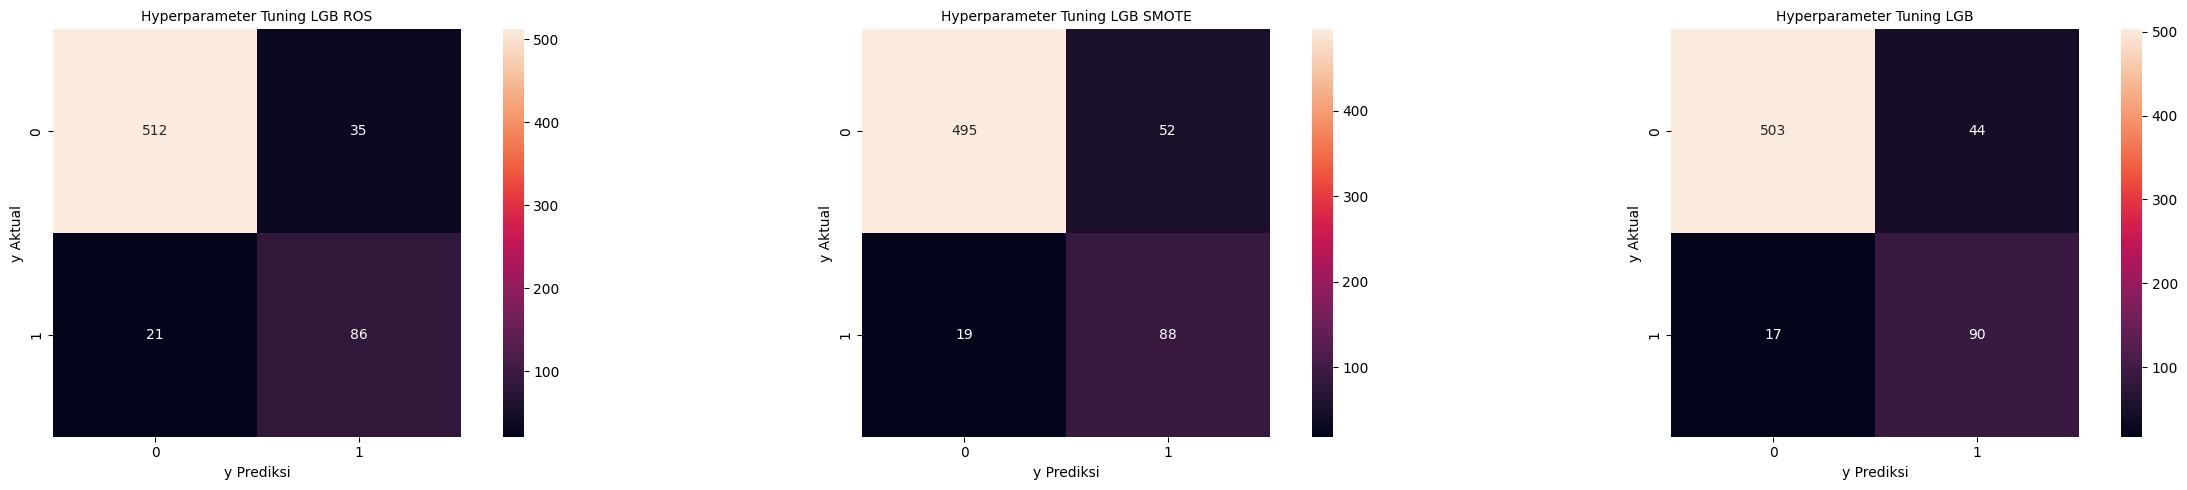

In [75]:
# Confusion Matrix setiap model

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuning_ros), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Hyperparameter Tuning LGB ROS', size=10)
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuning_smote), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Hyperparameter Tuning LGB SMOTE', size=10)
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Hyperparameter Tuning LGB', size=10)
plt.tight_layout()
plt.show()

- benchmarking diatas menggunakan parameter yang sama disetiap modelnya dan didapatkan nilai tertinggi pada test set yaitu LGBM tanpa menggunakan resampling dengan score 0.800711743772242. hal ini cukup wajar karena model sudah dilakukan penyetaraan kelas pada imbalanced data menggunakan class_weight = 'balanced', sehingga tidak diperlukan lagi proses resampling.
- Model LGBM tanpa resampling akan kita coba tuning lagi supaya menghasilkan performa model yang lebih baik lagi.

**F.4 Hyperparameter tuning V2.0 LGBM tanpa Resampling**

In [76]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [675, 650, 625],
    'model__num_leaves':[29, 26, 23],
    'model__min_data_in_leaf': [10],
    'model__num_iterations':[225, 250],
    'model__learning_rate': [0.03, 0.04],
    'model__max_depth' : [14, 17, 21],
}]

lgb_grid_2 = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space,
                      cv = skfold,
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_2.fit(X_train,y_train)

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Found `num_iterations` in params. Will use it instead of argument


[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                                                          'SatisfactionScore'])])),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.03, 0.04],
                          'model__max_bin': [675, 650, 625],
                          'model__max_depth': [14, 17, 21],
                          'model__min_data_in_leaf': [10],
                          'model__num_iterations': [225, 250],
                          'model__num_leaves': [29, 26, 23]}],
             scoring=make_scorer(fbeta_score, beta=2))

In [77]:
# create dataframe
pd.DataFrame(lgb_grid_2.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__max_depth,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.401921,0.020098,0.047924,0.011974,0.03,675,21,10,225,29,"{'model__learning_rate': 0.03, 'model__max_bin...",0.807175,0.812918,0.799550,0.775463,0.783664,0.795754,0.014123,1
6,0.416316,0.026044,0.045043,0.004303,0.03,675,17,10,225,29,"{'model__learning_rate': 0.03, 'model__max_bin...",0.810811,0.812918,0.799550,0.775463,0.777778,0.795304,0.015935,2
52,0.403096,0.009653,0.043012,0.002151,0.03,625,21,10,250,26,"{'model__learning_rate': 0.03, 'model__max_bin...",0.801354,0.794183,0.837104,0.742459,0.773543,0.789729,0.031292,3


In [78]:
print('LightGBM')
print('Best_score:', lgb_grid_2.best_score_)
print('Best_params:', lgb_grid_2.best_params_)

LightGBM
Best_score: 0.795753890844165
Best_params: {'model__learning_rate': 0.03, 'model__max_bin': 675, 'model__max_depth': 21, 'model__min_data_in_leaf': 10, 'model__num_iterations': 225, 'model__num_leaves': 29}


Parameter terbaik untuk Model LGBM ini
 - `learning_rate`    : 0.03
 - `max_bin`          : 675
 - `max_depth`        : 21
 - `min_data_in_leaf` : 10
 - `num_iterations`   : 225
 - `num_leaves`       : 29

---
> ## **G. Model Evaluation**

In [79]:
y_pred_test_tunned = lgb_grid_2.best_estimator_.predict(X_test)
f2_test_tunned = fbeta_score(y_test, y_pred_test_tunned, beta=2)
print(f'F2 Score LGBM Tuned           :', f2_test_tunned)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
F2 Score LGBM Tuned           : 0.8198198198198198


In [80]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgb)])
estimator = estimator.fit(X_train, y_train)

y_pred_default = estimator.predict(X_test)
f2_default = fbeta_score(y_test, y_pred_default, beta=2)
print(f'F2 Score LGBM Default        :', f2_default)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
F2 Score LGBM Default        : 0.7699275362318841


In [81]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_test_tunned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.69      0.79      0.74       107

    accuracy                           0.91       654
   macro avg       0.82      0.86      0.84       654
weighted avg       0.91      0.91      0.91       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       547
           1       0.72      0.85      0.78       107

    accuracy                           0.92       654
   macro avg       0.84      0.89      0.86       654
weighted avg       0.93      0.92      0.92       654



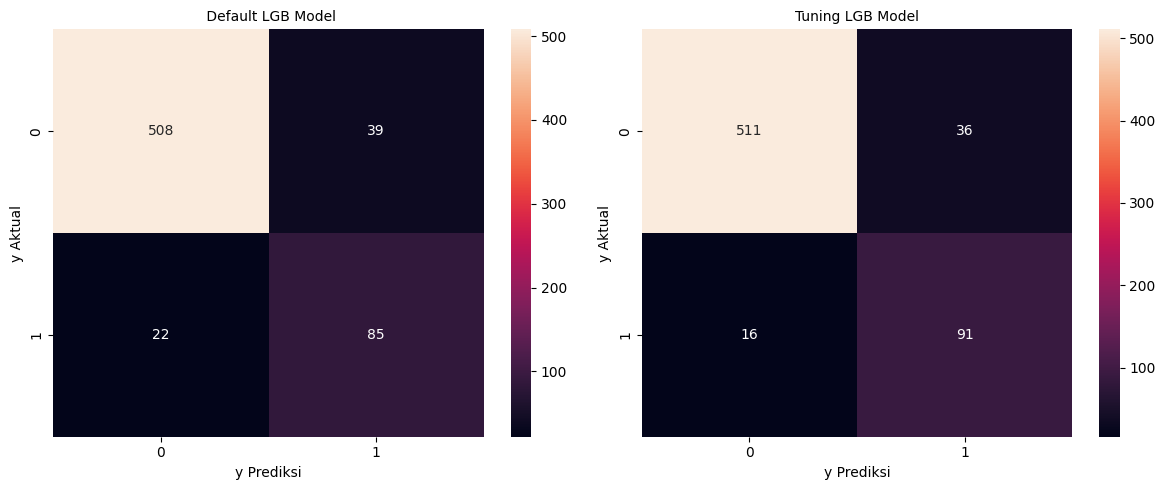

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f''' Default LGB Model''', size=10)
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test_tunned), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'''Tuning LGB Model''', size=10)
plt.tight_layout()
plt.show()

Proses Hyperparameter Tuning menghasilkan performa model LGBM tanpa resampling yang lebih baik:

1. F2 Score
- Default LGBM     : 76.99%
- Tuned LGBM       : 81.98%

2. dengan score pada test set hampir 82% ini kita mengetahui bahwa model kita tidak mengalami underfitting.

3. Dengan membandingkan score pada train set dan test set kita bisa mengetahui bahwa model yang kita bangun tidak mengalami Overfitting.

4. Accuracy, Recall, Precision, F1 Score juga mengalami peningkatan score pada kelas 0 maupun kelas 1.

**G.1 Save Model**

In [85]:
best_model = lgb_grid_2.best_estimator_
save_model = best_model.fit(X_train, y_train)

save_path = '/content/drive/MyDrive/AhmadH_CapstoneProject3/best_lgb_model.pkl'
pickle.dump(save_model, open(save_path, 'wb'))


[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.2s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Found `num_iterations` in params. Will use it instead of argument


[Pipeline] ............. (step 2 of 2) Processing model, total=   0.4s


---
> ## **H. Explainable Model**

Tujuan dari Explainability dalam Machine Learning adalah untuk mengungkapkan masalah kotak hitam, dengan kata lain, untuk menjelaskan alasan yang mengarah pada output model untuk mengatasi masalah pada perusahaan.

In [86]:
# Load Dataset
customer = pd.read_csv('/content/drive/MyDrive/AhmadH_CapstoneProject3/data_ecommerce_customer_churn.csv')
customer.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [90]:
# Import Model
save_path = '/content/drive/MyDrive/AhmadH_CapstoneProject3/best_lgb_model.pkl'

# Save the model using pickle
with open(save_path, 'wb') as lgbm:
    pickle.dump(save_model, lgbm)

# Load the model using pickle
with open(save_path, 'rb') as lgbm:
    lgbm = pickle.load(lgbm)


In [91]:
ohe_cols = list(lgbm[0].transformers_[0][1].get_feature_names_out())
impute_cols = list(lgbm[0].transformers_[1][1].get_feature_names_out())
remainder_cols = ['Complain']
cols = ohe_cols + impute_cols + remainder_cols

# Preprocessing
candidate_pre = lgbm.named_steps['Transformation'].transform(df) # Data yang telah di preprocessing

model = lgbm.named_steps['model'] # Ambil model
features = cols # Nama-nama kolom hasil preprosesing

shap_values = shap.TreeExplainer(model,
                                 data = candidate_pre,
                                #  feature_dependence="independent",
                                 feature_perturbation="interventional",
                                 model_output="probability").shap_values(candidate_pre)


 99%|===================| 3246/3269 [01:08<00:00]       

**H.1 Feature Importance & SHAP Summary Plot**

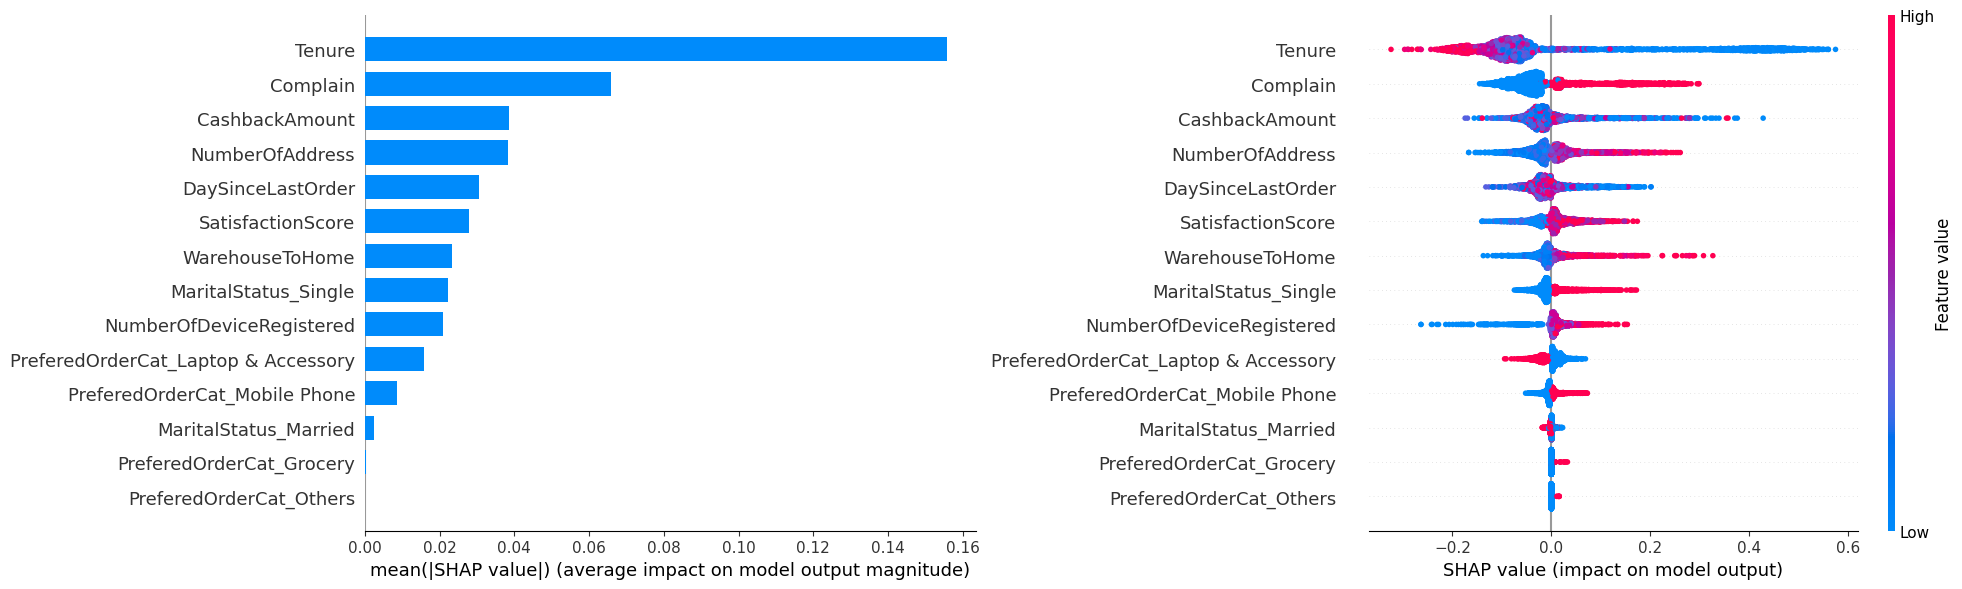

In [92]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='Feature Importance', plot_type='bar', show=False, plot_size=None)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='SHAP Feature', show=False, plot_size=None)
plt.show()

**Penjelasan SHAP Feature Importance dan SHAP Summary Plot**
1. Pada Model LGBM ini, fitur `Tenure` menjadi fitur yang paling penting terlihat fitur ini sangat berdampak pada customer churn.
2. Pada summary plot ini, secara umum terlihat bahwa semakin kecil `Tenure` artinya semakin baru customer tersebut join layanan E-Commerce ini, semakin berpengaruh fitur ini terhadap customer churn dan berlaku pula sebaliknya.
3. Fitur `Complain` juga termasuk fitur yang cukup penting
4. Semakin tinggi nilai complain (jika customer melakukan complain), maka dapat berdampak pada customer churn.
5. Fitur paling berpengaruh setelah `Tenure` dan `Complain` adalah `NumberOfAddress`.
6.Semakin tinggi nilai `NumberOfAddress`, maka dapat berdampak pada customer churn


**10 Customer paling berpotensi Churn**

In [93]:
pred_proba = lgbm.predict_proba(customer)

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


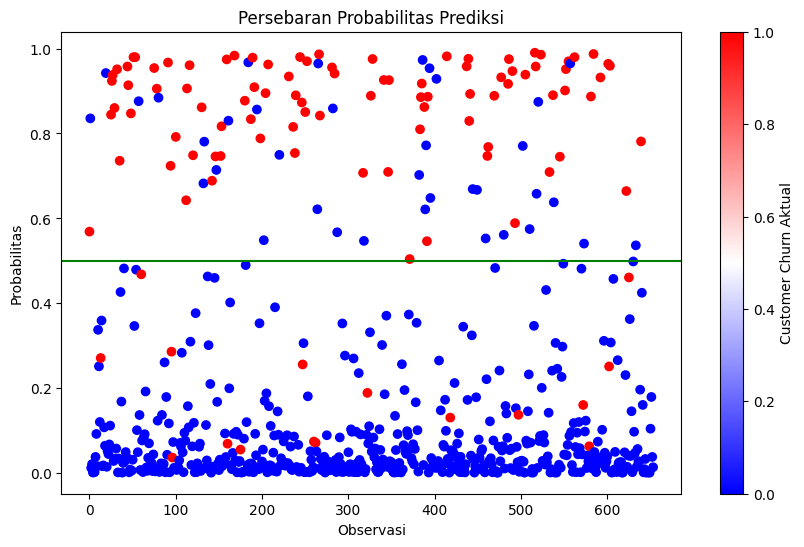

In [103]:
# Probability VS Actual
plt.figure(figsize=(10,6))
plt.scatter(x=range(len(y_pred_default)), y=lgbm.predict_proba(X_test)[:,1], c=y_test, cmap='bwr')
plt.axhline(y=0.5, color='g', linestyle='-')
plt.title('Persebaran Probabilitas Prediksi')
plt.ylabel('Probabilitas')
plt.xlabel('Observasi')
plt.colorbar(label='Customer Churn Aktual')
plt.show();


Dari grafik di atas, kita dapat mengidentifikasi beberapa insight dari grafik probabilitas prediksi sebagai berikut:

Pelanggan Churn dan Non-Churn: Grafik menunjukkan dua kelompok utama warna, yaitu merah dan biru, yang mewakili pelanggan churn dan non-churn. Warna merah mendekati angka 1, sementara warna biru mendekati angka 0. Ini menunjukkan bahwa model cenderung memberikan probabilitas tinggi untuk pelanggan churn dan probabilitas rendah untuk pelanggan non-churn.

Threshold pada 0.5: Pada nilai threshold 0.5, terlihat bahwa ada pemisahan antara kedua kategori. Data di atas threshold dianggap sebagai pelanggan churn, sedangkan di bawah threshold dianggap sebagai pelanggan non-churn. Ini adalah keputusan pemotongan yang umum digunakan dalam model klasifikasi.

Kesalahan Prediksi: Terdapat sedikit data yang salah prediksi, yang dapat dilihat dari adanya warna yang tidak sesuai dengan kategori yang seharusnya. Ini bisa berarti ada beberapa pelanggan yang seharusnya tidak churn tetapi diprediksi sebagai churn (false positive) atau sebaliknya (false negative).

Persebaran yang Sesuai secara Keseluruhan: Meskipun ada sedikit kesalahan prediksi, secara keseluruhan, grafik menunjukkan bahwa model memiliki kemampuan untuk membedakan antara pelanggan churn dan non-churn dengan baik. Hal ini terlihat dari pemisahan yang jelas antara warna merah dan biru.

Sedikit Data Mendekati Threshold: Grafik menampilkan bahwa hanya sedikit data yang berada mendekati threshold 0.5. Ini mungkin mengindikasikan bahwa model memiliki tingkat kepercayaan yang tinggi dalam membuat prediksi, dan sebagian besar prediksinya jauh dari batas keputusan (0 atau 1). Hal ini dapat diinterpretasikan sebagai model memiliki tingkat keyakinan yang baik dalam mengklasifikasikan pelanggan.

Secara keseluruhan, grafik probabilitas prediksi menunjukkan kinerja model yang baik dalam membedakan antara pelanggan churn dan non-churn, meskipun ada beberapa kesalahan prediksi yang terjadi.

In [94]:
customer['Prediction(Prob->1)'] = pred_proba[:,1]
customer.sort_values(by='Prediction(Prob->1)', ascending=False).head(10)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Prediction(Prob->1)
2244,1.0,9.0,5,Mobile Phone,3,Single,8,1,1.0,145.90,1,0.993216
1088,0.0,30.0,5,Mobile Phone,2,Single,2,1,0.0,111.18,1,0.992210
2800,0.0,30.0,5,Mobile Phone,1,Single,2,1,0.0,111.18,1,0.992210
148,1.0,20.0,5,Mobile Phone,5,Married,6,1,1.0,148.35,1,0.991954
487,1.0,17.0,5,Mobile Phone,5,Single,8,1,1.0,149.04,1,0.991410
2685,1.0,17.0,5,Mobile Phone,5,Single,8,1,1.0,149.04,1,0.991410
2154,1.0,31.0,6,Mobile Phone,2,Single,3,1,1.0,136.18,1,0.990198
3474,1.0,31.0,6,Mobile Phone,1,Single,3,1,1.0,136.18,1,0.990198
2099,0.0,29.0,4,Laptop & Accessory,3,Divorced,4,1,1.0,159.16,1,0.990120
2590,0.0,29.0,4,Laptop & Accessory,3,Married,4,1,1.0,159.16,1,0.989932


kita bisa melihat 10 kandidat paling berpotensi melakukan Churn dilihat dari Probabilitas dia melakukan churn.
- 10 customer tersebut memiliki probabilitas 98.99 - 99.32% melakukan Churn.
- 10 customer tersebut memiliki `Tenure` 0 atau 1
- 10 customer tersebut 1 bulan terakhir bertransaksi dengan kategori `Mobile Phone` dan `Laptop & Accessory`.
- 10 Customer tersebut melakukan Complain
- 10 tersebut baru saja melakukan order 0 atau 1 hari yang lalu.

**Individual SHAP**

kita ingin melihat karakteristik customer yang berpotensi churn

In [95]:
def shap_plot(j,model,S, columns):
    shap.initjs()
    values = model.predict(S, pred_contrib=True)
    y_pred = model.predict(S)[j]
    shap_values = values[:,:-1]
    base_values = values[:,-1]

    p = shap.force_plot(base_values[j], shap_values[j], S[j], columns)
    print(f"The prediction must predict this Customer: {('Potential' if y_pred == 1 else 'Not Potential')} to Churn")
    return p

In [96]:
prob_churn =  customer[customer['Churn'] == 1].sort_values('Prediction(Prob->1)', ascending=False)

In [97]:
# Customer paling berpotensi Churn ke 1
model = lgbm.named_steps['model']
feature = lgbm.named_steps['Transformation'].transform(prob_churn)
columns = cols

shap_plot(0,model,feature, columns)

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction must predict this Customer: Potential to Churn


In [98]:
# Customer paling berpotensi Churn ke 2
shap_plot(1,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction must predict this Customer: Potential to Churn


In [99]:
# Customer paling berpotensi Churn ke 10
shap_plot(9,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction must predict this Customer: Potential to Churn


Customer ke 1, 2 dan 10 yang paling berpotensi untuk churn memiliki karakteristik yang hampir sama, yaitu:
- Faktor yang paling mempengaruhi dia akan churn yaitu `Tenure`, `Complain`. Hal ini sama dengan analisa feature importance yang dilakukan di atas.

---
>## **I. Conclusion & Recommendation**

>### **I.1 Conclusion**

#### **Model dapat melakukan prediksi sehingga promosi lebih tepat sasaran**

In [100]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       547
           1       0.72      0.85      0.78       107

    accuracy                           0.92       654
   macro avg       0.84      0.89      0.86       654
weighted avg       0.93      0.92      0.92       654



Tujuan dari project ini adalah untuk mengetahui prediksi seorang customer apakah akan melakukan churn atau tidak menggunakan jasa perusahaan e-commerce ini lagi. Berdasarkan business problem di atas, diketahui bahwa:

- model dapat mengetahui 93% pelanggan yang tidak churn dan 85% pelanggan yang churn (Berdasarkan Recall)
- Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 72%. Maka masih ada pelanggan yang churn dan diprediksi sebagai tidak churn sebesar 15%.

**Type 1 error** : False Positive  
Konsekuensi: [*operation loss*](https://www.investopedia.com/terms/o/operating-loss.asp#:~:text=An%20operating%20loss%20occurs%20when,profit%20before%20interest%20and%20taxes.) karena mengeluarkan biaya promo untuk pelanggan yang tidak tepat. biaya yang dikeluarkan sebesar 50 USD per customer bulan[source](https://sci-hub.se/https://doi.org/10.1016/j.jretconser.2017.10.007).

**Type 2 error** : False Negative  
Konsekuensi: *profit loss* karena customer *churn*. biaya yang dikeluarkan 5x lipat dari biaya promo ke customer 250 USD per customer per bulan[source](https://www.superoffice.com/blog/reduce-customer-churn/)

**TANPA MENGGUNAKAN MACHINE LEARNING**

Perusahaan e-commerce tidak dapat mengetahui customer yang akan melakukan churn, sehingga perusahaan e-commerce harus memberikan promosi ke semua customer, agar perusahaan tidak kehilangan customer. Ini menyebabkan perusahaan e-commerce harus mengeluarkan biaya yang besar dalam mengimplentasikan strategi promosinya.

- Pengeluaran perusahaan untuk promosi ke semua customer 50 USD x 654 = 32.700 USD
- Promosi yang tepat sasaran pada orang yang churn: 250 USD X 107 = 26.750 USD

Sehingga diketahui bahwa perusahaan e-commerce mengeluarkan biaya yang tidak tepat sasaran (biaya promosi untuk customer yang loyal) sebesar: - 32.700 + 26.750 USD = **- 5.950 USD**. Karena 654 customer adalah 1/5 dari total customer (3.269) maka -5.950 USD x 5 = **-29.750 USD**. Biaya tersebut seharusnya dapat ditekan jika menggunakan Machine Learning

**DENGAN MENGGUNAKAN MACHINE LEARNING**

Biaya yang tidak tepat sasaran di atas, dapat ditekan jika menggunakan Machine Learning, dengan memprediksi customer yang akan melakukan churn. Sehingga biaya promosi dapat difokuskan kepada customer yang akan melakukan churn, berdasarkan dari hasil prediksi dari Machine Learning.

- Pengeluaran perusahaan e-commerce promosi yang diprediksi churn (FP+TP): (36+91) x 50 USD = 6.350 USD
- Perusahaan e-commerce kehilangan customer karena tidak terprediksi akan churn (FN): 16 x 250 USD = 4.000 USD
- Promosi tepat sasaran (TP): 91 x 250 USD = 22.750 USD

Sehingga diketahui bahwa perusahaan e-commerce berhasil menghasilkan Revenue per bulan sebesar: - 6.350 - 4.000 + 22.750 = **12.400 USD**. Karena 654 customer adalah 1/5 dari total customer (3.269) maka 12.400 USD x 5 = **62.000 USD**

**PERBANDINGAN PENGGUNAAN MACHINE LEARNING**

- Sebelum pakai ML: perusahaan merugi **-29.750 USD** per bulan
- Setelah menggunakan ML: perusahaan berhasil menghasilkan profit **62.000 USD** per bulan

Dapat disimpulkan bahwa Machine Learning dengan menggunakan algoritma LightGBM setelah tuning dua kali berhasil menghasilkan profit **62.000** per bulan.


#### **Faktor yang mempengaruhi Customer Churn**

Berdasarkan Feature Importance dan Summary Plot, 3 Faktor utama yang mempengaruhi prediksi Customer Churn secara berurutan adalah
1. `Tenure`
  - Semakin kecil nilai `Tenure` artinya semakin baru customer berlangganan semakin besar kemungkinan Customer akan churn dan semakin lama customer berlangganan semakin betah dia terhadap layanan perusahaan. `Tenure` memiliki tingkat pengaruh lebih dari 300% dari `Complain`
2. `Complain`
  - Semakin besar nilai `Complain` semakin besar kemungkinan Customer akan Churn dan sebaliknya. nilai yang besar artinya customer melakukan complain atau customer tidak puas terhadap layanan.
3. `NumberOfAddress`
  - Semakin besar nilai `NumberOfAddress` semakin besar kemungkinan Customer akan Churn dan sebaliknya. nilai yang besar artinya alamat yang didaftarkan semakin banyak. Hal ini dimungkinkan jika Customer tersebut berpindah alamat.

>### **I.2 Recommendation**

**For Business:**

Customer yang melakukan churn dapat menimbulkan kerugian bagi perusahaan.
1. perusahaan e-commerce perlu menyusun strategi agar dapat tetap menjaga kualitas produk dan pelayanan agar dapat menghindari complain yang masuk.
1. perusahaan e-commerce perlu menyusun strategi agar dapat menciptakan loyalitas pelanggan, baik dengan melakukan inovasi pada produk yang dipasarkan dan memberikan penawaran yang menarik, sehingga tenure customer semakin tinggi.
1. perusahaan e-commerce perlu memahami Marketing Funnel. Marketing Funnel adalah sebuah konsep untuk menjelaskan tahapan yang dilalui oleh pelanggan sebelum akhirnya melakukan pembelian produk. Dengan mengetahui dan memahami Marketing Funnel, maka sebuah perusahaan akan lebih mudah untuk mengidentifikasi penyebab pelanggan membatalkan pembelian, sehingga dapat menyusun strategi untuk dapat mengatasinya.
1. Perusahaan perlu menggunakan machine learning yang sudah dibuat, agar dapat mengurangi kerugian bagi perusahaan dengan memberikan promosi tepat sasaran kepada customer yang akan melakukan churn.
1. Untuk prediksi customer selanjutnya dapat menggunakan WebApp yang sudah disediakan, guna memudahkan perusahaan dan dapat mendeteksi sedini mungkin kemungkinan customer churn.

**For Model:**

Akurasi model machine learning yang dibuat terbatas pada range feature:
- Tenure: 0-61 bulan
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 hari
- Cashback Amount: 0-324.99

1. Mengumpulkan lebih banyak data khususnya pada minority class
1. Menambahkan parameter lain dalam hyperparameter tuning
1. Menambahkan ID customer untuk memastikan dan mengetahui data yang duplikat
1. Menambahkan feature lain seperti lama pengiriman produk, ketepatan waktu pengiriman, dan lain-lain.
1. Meminimalisir kesalahan penulisan data dan memastikan data yang diperoleh tidak ada yang kosong atau tidak terisi



Dengan adanya rekomendasi diatas, diharapkan perusahaan e-commerce dapat menurunkan biaya marketing dan diharapkan dapat meningkatkan profit dengan adanya pelanggan loyal.